### Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
# Preprocessing of Numerical and Categorical Data
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn import pipeline
from sklearn import compose

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Read Data
Main: rentals_dataset.csv

Supplemented datasets:
1. hdb_rentals
2. hdb_locations
3. train_locations
4. mrt_locations
5. busstop_locations
6. school_locations
7. moeschools (Generalinformationofschools.csv)
8. intschool_locations
9. shopping_locations

Other Available Datasets:
- hdb_mapping_price_per_sqm.csv
- hdb_mapping_units.csv
- hdb_rentals.csv
- hdb_resales.csv
- mrt_lrt_data.csv
- new_resales.csv
- old_resales.csv

In [4]:
rentals_dataset = pd.read_csv('rentals_dataset.csv', index_col=0)

In [5]:
rentals_dataset

date           town block         street_name flat_type  \
0       2021-01     ANG MO KIO   105    ANG MO KIO AVE 4    4 ROOM   
1       2021-01     ANG MO KIO   107    ANG MO KIO AVE 4    3 ROOM   
2       2021-01     ANG MO KIO   108    ANG MO KIO AVE 4    3 ROOM   
3       2021-01     ANG MO KIO   111    ANG MO KIO AVE 4    5 ROOM   
4       2021-01     ANG MO KIO   111    ANG MO KIO AVE 4    5 ROOM   
...         ...            ...   ...                 ...       ...   
104599  2023-12     QUEENSTOWN    59      STRATHMORE AVE    4 ROOM   
104600  2023-12      WOODLANDS  681D     WOODLANDS DR 62    4 ROOM   
104601  2023-12  CHOA CHU KANG   354  CHOA CHU KANG CTRL    4 ROOM   
104602  2023-12         YISHUN   717        YISHUN ST 71    4 ROOM   
104603  2023-12      TOA PAYOH   159     LOR 1 TOA PAYOH    3 ROOM   

        monthly_rent flat_type_group     region  postal       lat  ...  \
0               2000          4-ROOM  Northeast  560105  1.372313  ...   
1               1750          3-ROOM  Northeast  560107  1.371384  ...   
2               1750          3-ROOM  Northeast  560108  1.370966  ...   
3               2230          5-ROOM  Northeast  560111  1.370851  ...   
4               2450          5-ROOM  Northeast  560111  1.370851  ...   
...              ...             ...        ...     ...       ...  ...   
104599          4100          4-ROOM    Central  142059  1.293190  ...   
104600          3300          4-ROOM      North  734681  1.440000  ...   
104601          2950          4-ROOM       West  680354  1.382645  ...   
104602          3200          4-ROOM      North  760717  1.425752  ...   
104603          1800          3-ROOM    Central  310159  1.330745  ...   

        train_type  train_dist  nearest_busstop  busstop_dist  \
0              MRT    0.073864          BLK 163      0.221126   
1              MRT    0.145786          BLK 110      0.121067   
2              MRT    0.228003          BLK 110      0.166360   
3              MRT    0.201841          BLK 110      0.070626   
4              MRT    0.201841          BLK 110      0.070626   
...            ...         ...              ...           ...   
104599         MRT    0.623560    Aft Dawson Rd      0.097950   
104600         MRT    1.797553         Blk 681A      0.086782   
104601         MRT    0.319505          Blk 352      8.165670   
104602         MRT    0.885971          Blk 722      3.865604   
104603         MRT    0.275142    Toa Payoh Int      0.204649   

                      nearest_shopping shopping_dist  \
0                        DJIT SUN MALL      1.118528   
1                        DJIT SUN MALL      1.153074   
2                        DJIT SUN MALL      1.071018   
3                        DJIT SUN MALL      1.172078   
4                        DJIT SUN MALL      1.172078   
...                                ...           ...   
104599     ANCHORPOINT SHOPPING CENTRE      0.860724   
104600                    HILLION MALL      8.211613   
104601         LOT ONE, SHOPPERS' MALL      0.305189   
104602                   DJIT SUN MALL      6.271406   
104603  BALESTIER HILL SHOPPING CENTRE      0.664506   

                         nearest_school school_dist  \
0            MAYFLOWER SECONDARY SCHOOL    0.513867   
1            MAYFLOWER SECONDARY SCHOOL    0.412621   
2            MAYFLOWER SECONDARY SCHOOL    0.435416   
3            MAYFLOWER SECONDARY SCHOOL    0.358742   
4            MAYFLOWER SECONDARY SCHOOL    0.358742   
...                                 ...         ...   
104599      QUEENSTOWN SECONDARY SCHOOL    0.218686   
104600  WOODLANDS RING SECONDARY SCHOOL    0.546931   
104601          KRANJI SECONDARY SCHOOL    0.864874   
104602      NAVAL BASE SECONDARY SCHOOL    0.780952   
104603               KHENG CHENG SCHOOL    0.753227   

                                        nearest_intschool intschool_dist  
0                         AUSTRALIAN INTERNATIONAL SCHOOL       3.444260  
1               

In [6]:
#Check for Missing Values
print(rentals_dataset.isna().any()) 

date                  False
town                  False
block                 False
street_name           False
flat_type             False
monthly_rent          False
flat_type_group       False
region                False
postal                False
lat                   False
lng                   False
property_age          False
avg_floor_area_sqm    False
price_sqm             False
nearest_train         False
train_type            False
train_dist            False
nearest_busstop       False
busstop_dist          False
nearest_shopping      False
shopping_dist         False
nearest_school        False
school_dist           False
nearest_intschool     False
intschool_dist        False
dtype: bool


### Data Exploration and Analysis

#### Number of rentals rented across the towns
Bar plot in descending order

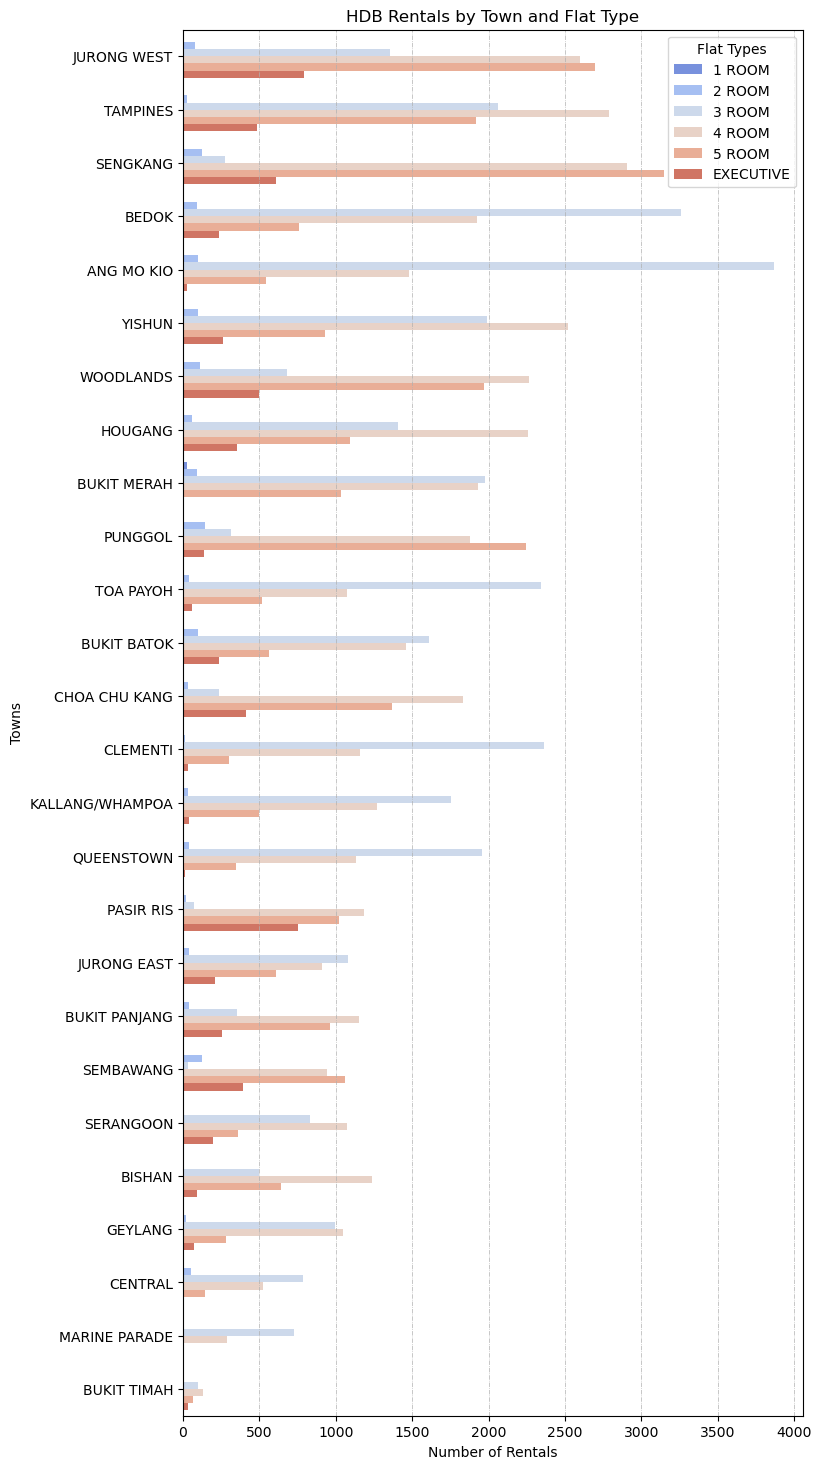

In [7]:
### Set Data Table ###
# Group the data by 'town' and 'flat_type' and count the occurrences
town_rentals = rentals_dataset.groupby(['town', 'flat_type']).size().unstack(fill_value=0)

# Calculate total rentals per town
total_rentals_per_town = town_rentals.sum(axis=1)

# Melt the DataFrame to long format
town_rentals_long = town_rentals.reset_index().melt(id_vars='town', var_name='flat_type', value_name='count')

# Merge total rentals into the long DataFrame
town_rentals_long = town_rentals_long.merge(total_rentals_per_town.rename('total_rentals'), on='town')

# Sort the DataFrame first by total rentals, then by flat type
town_rentals_long_sorted = town_rentals_long.sort_values(by=['total_rentals', 'flat_type'], 
                                                         ascending=[False, True])

### Plotting ###
# Set color palette, built-in palettes: 'coolwarm', 'viridis', 'rocket'.
palette = "coolwarm" 

# Create a bar plot with the sorted data
plt.figure(figsize=(8, 18))
sns.barplot(data=town_rentals_long_sorted, y='town', x='count', hue='flat_type', palette=palette)

# Graph Formatting
plt.grid(True, axis='x', linestyle='-.', linewidth=0.5)
plt.xlabel('Number of Rentals')
plt.ylabel('Towns')
plt.title('HDB Rentals by Town and Flat Type')
plt.legend(title='Flat Types')

plt.show()


#### Overall Rentals Trends
Line plot - x: date, y:count

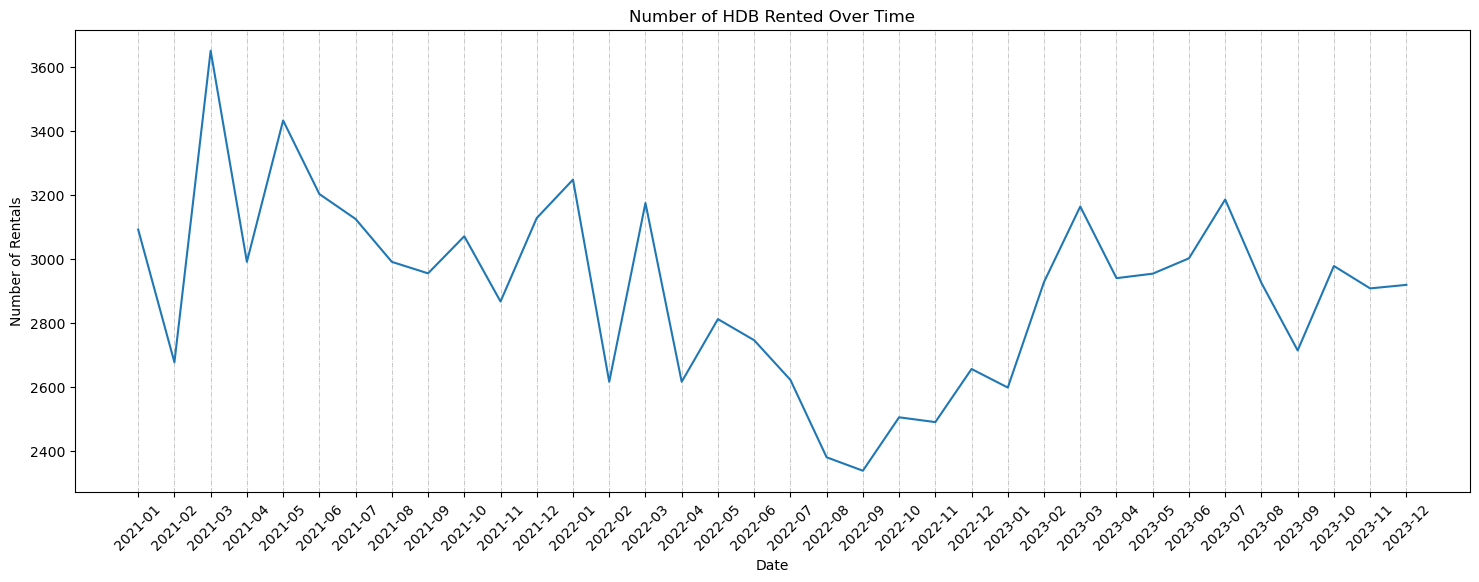

In [8]:
### Set Data Table ###
# Calculate the value counts and convert to DataFrame
rentals_trend = rentals_dataset['date'].value_counts().sort_index()
rentals_trend_df = rentals_trend.reset_index()
rentals_trend_df.columns = ['date', 'count']

### Plotting ###
# Create the line plot using Seaborn
plt.figure(figsize=(18, 6))
g = sns.lineplot(data=rentals_trend_df, x='date', y='count')

# Graph Formatting
plt.grid(True, axis='x', linestyle='-.', linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.title('Number of HDB Rented Over Time')
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### HDB rental price trend over time overall

#### HDB rental price trend over time by town

#### Number of HDB Rented Trends over time by Towns
Line plot - x: date, y:count by towns

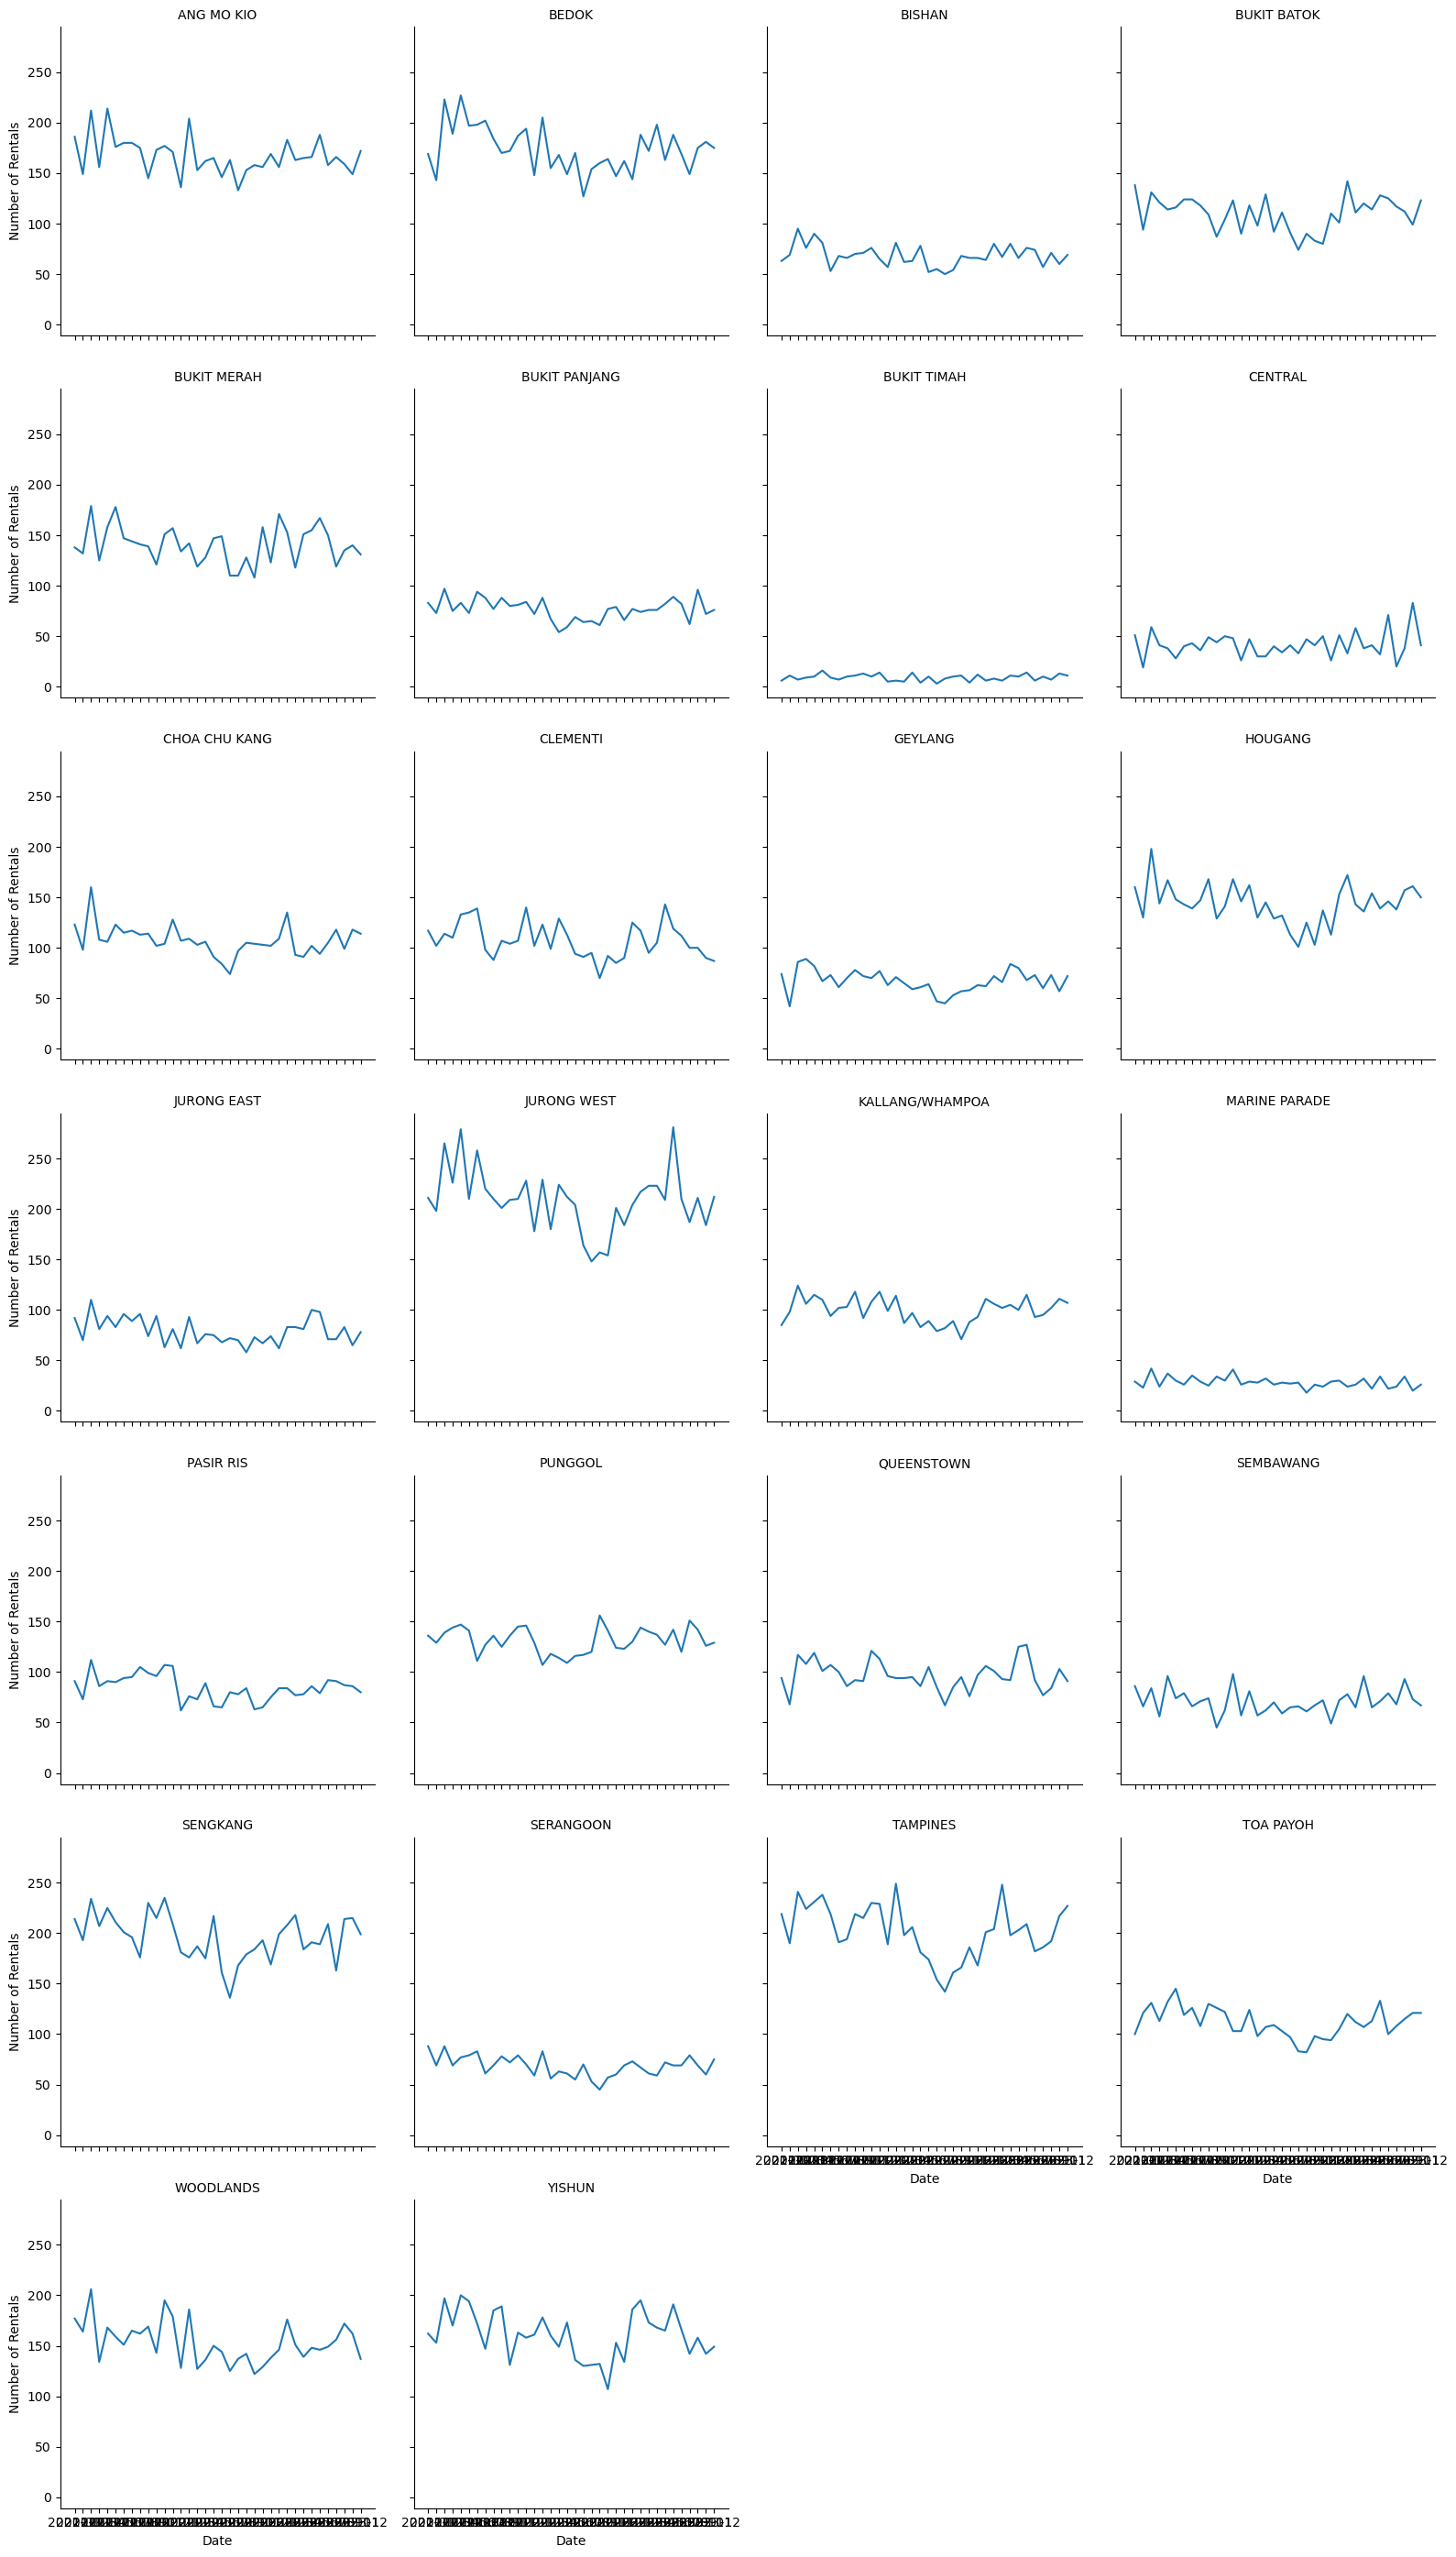

In [9]:
### Set Data Table ###
# Calculate the value counts and convert to DataFrame
#rental_trends_bytown = hdb_rentals.groupby(['town', 'flat_type']).size().unstack(fill_value=0)
rental_trends_bytown = rentals_dataset.groupby(['date', 'town']).size().sort_index()
rental_trends_bytown_df = rental_trends_bytown.reset_index()
rental_trends_bytown_df.columns = ['date', 'town', 'count']

### Plotting ###
# Set up the FacetGrid for sub line plots
g = sns.FacetGrid(rental_trends_bytown_df, col='town', col_wrap=4, height=4, sharex=True)
g = g.map(sns.lineplot, 'date', 'count')

# Graph Formatting
g = g.set_titles('{col_name}')
g.set_axis_labels('Date', 'Number of Rentals')

plt.show()

##### Box plot on monthly rental cost in each town based on flat type

Dashboard: - allow to filter by flat type

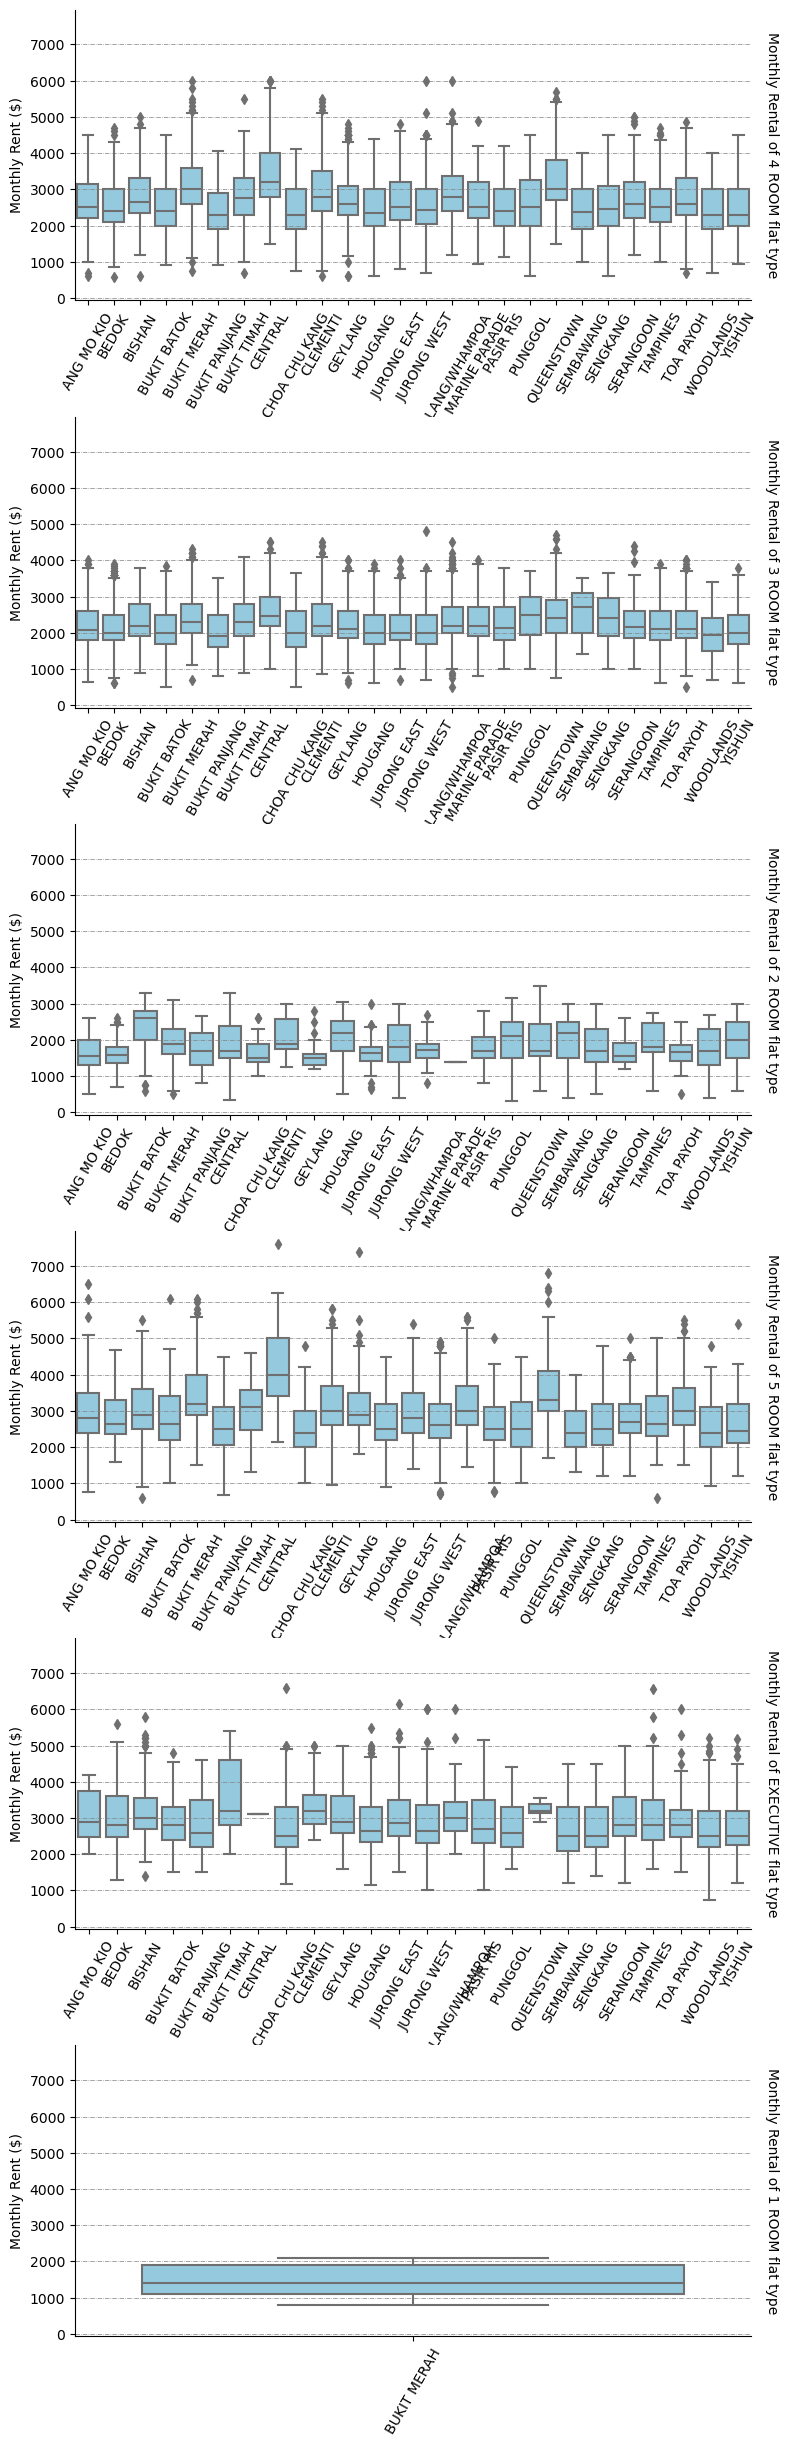

In [10]:
### Plotting ###
#palette = sns.color_palette("flare", n_colors=hdb_rentals['flat_type'].nunique())

g = sns.catplot(
    data=rentals_dataset.sort_values(by='town'),
    y="monthly_rent", x="town", row="flat_type",
    kind="box", orient="v",
    sharex=False, 
    margin_titles=True,
    height=4, aspect=2,
    color="skyblue"
)

# Graph Formatting
g.set(xlabel="", ylabel="Monthly Rent ($)")
g.set_titles(row_template="Monthly Rental of {row_name} flat type")

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60) 
    ax.grid(True, which='both', axis='y', color='gray', linestyle='-.', linewidth=0.5)
    
g.fig.subplots_adjust(hspace=0.4, wspace=0.2) 

plt.savefig('monthlyrent_town.png', dpi=300, bbox_inches='tight')

In [11]:
### DATA INVESTIGATION
# Identify the major 3-ROOM FLAT OUTLIERS IN BUKIT MERAH
#df = rentals_dataset
#df[(df['monthly_rent'] > 4800) & (df['town'] == 'GEYLANG') & (df['flat_type'] == '5 ROOM')]

In [12]:
### DATA INVESTIGATION
# Identify the data points which are not part of the outliers of "3-ROOM FLAT IN BUKIT MERAH"
#hdb_rentals[(hdb_rentals['monthly_rent'] < 4000) & (hdb_rentals['town'] == 'BUKIT MERAH') & (hdb_rentals['flat_type'] == '3-ROOM')]

#### scatter plot with subplots on train distance based on town
Identify the correlations of all the towns between train_dist and monthly_rent
- can go deeper by each town to identify patterns with the train locations

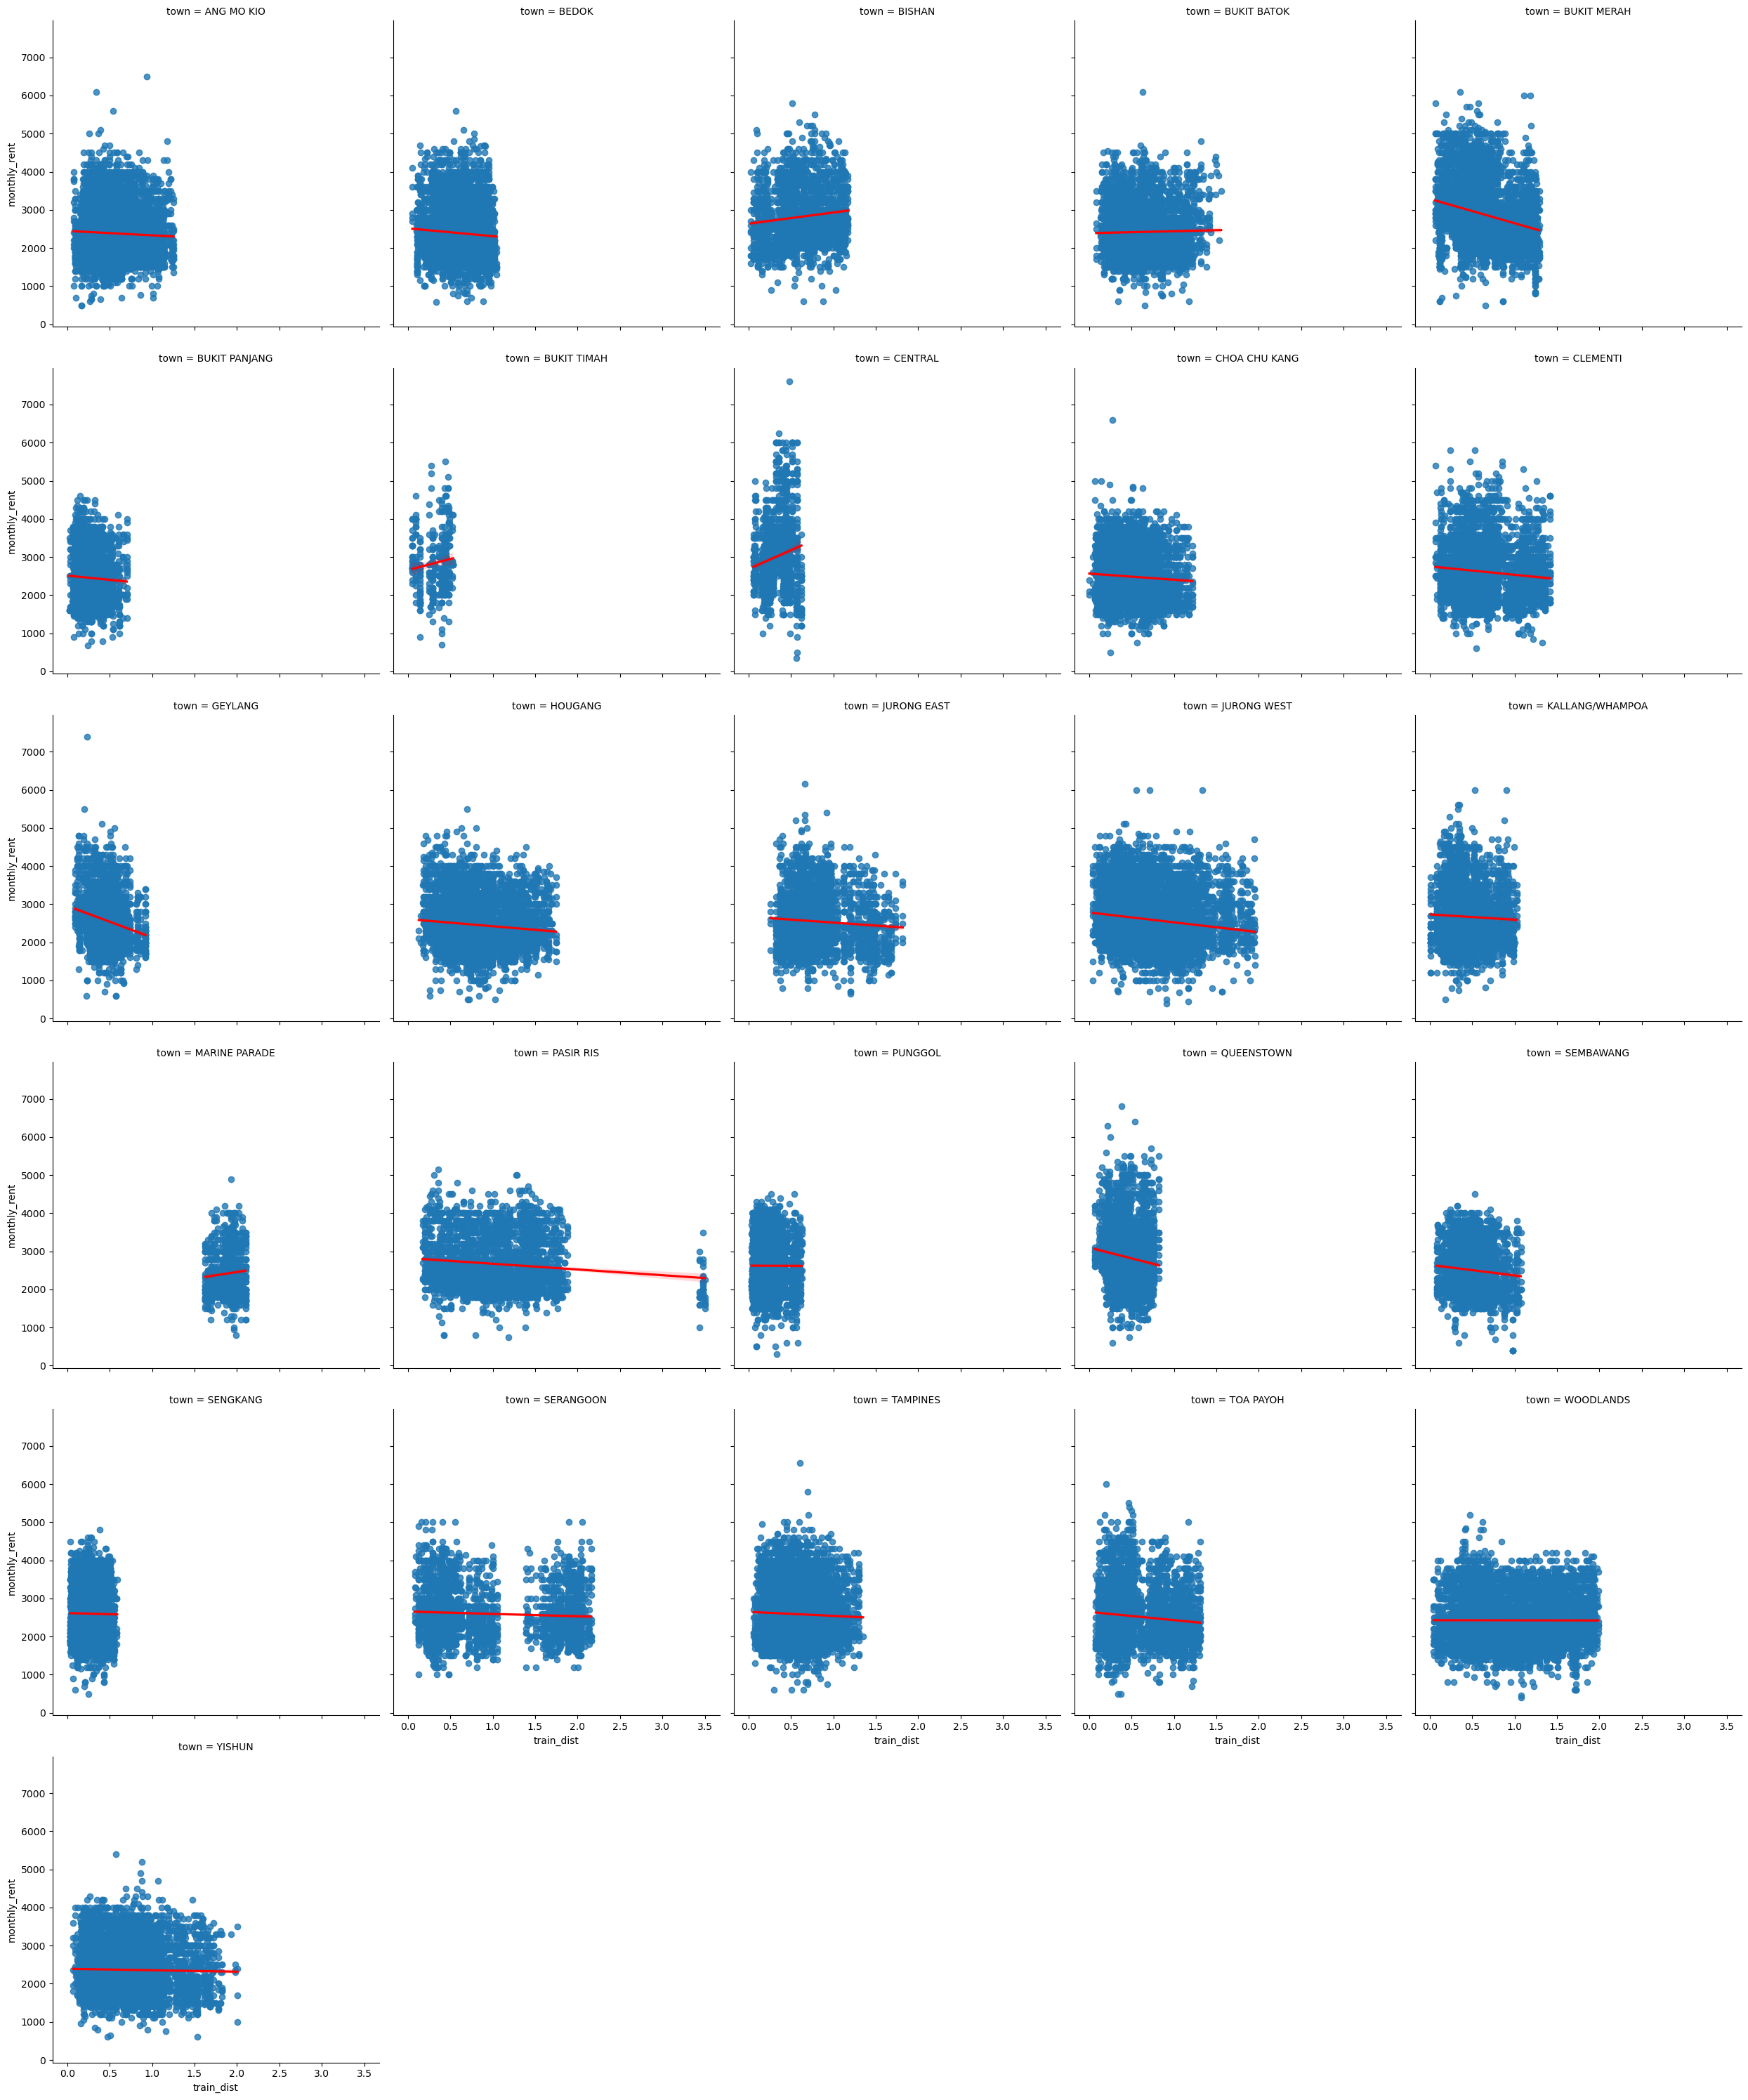

In [13]:
rent_train_corr = sns.lmplot(
    data=rentals_dataset, x="train_dist", y="monthly_rent",
    col="town", col_wrap=5, line_kws={'color': 'red'}
)

#### scatter plot with subplots on busstop distance based on town
Identify the correlations of all the towns between busstop_dist and monthly_rent
- can go deeper by each town to identify patterns with the busstops

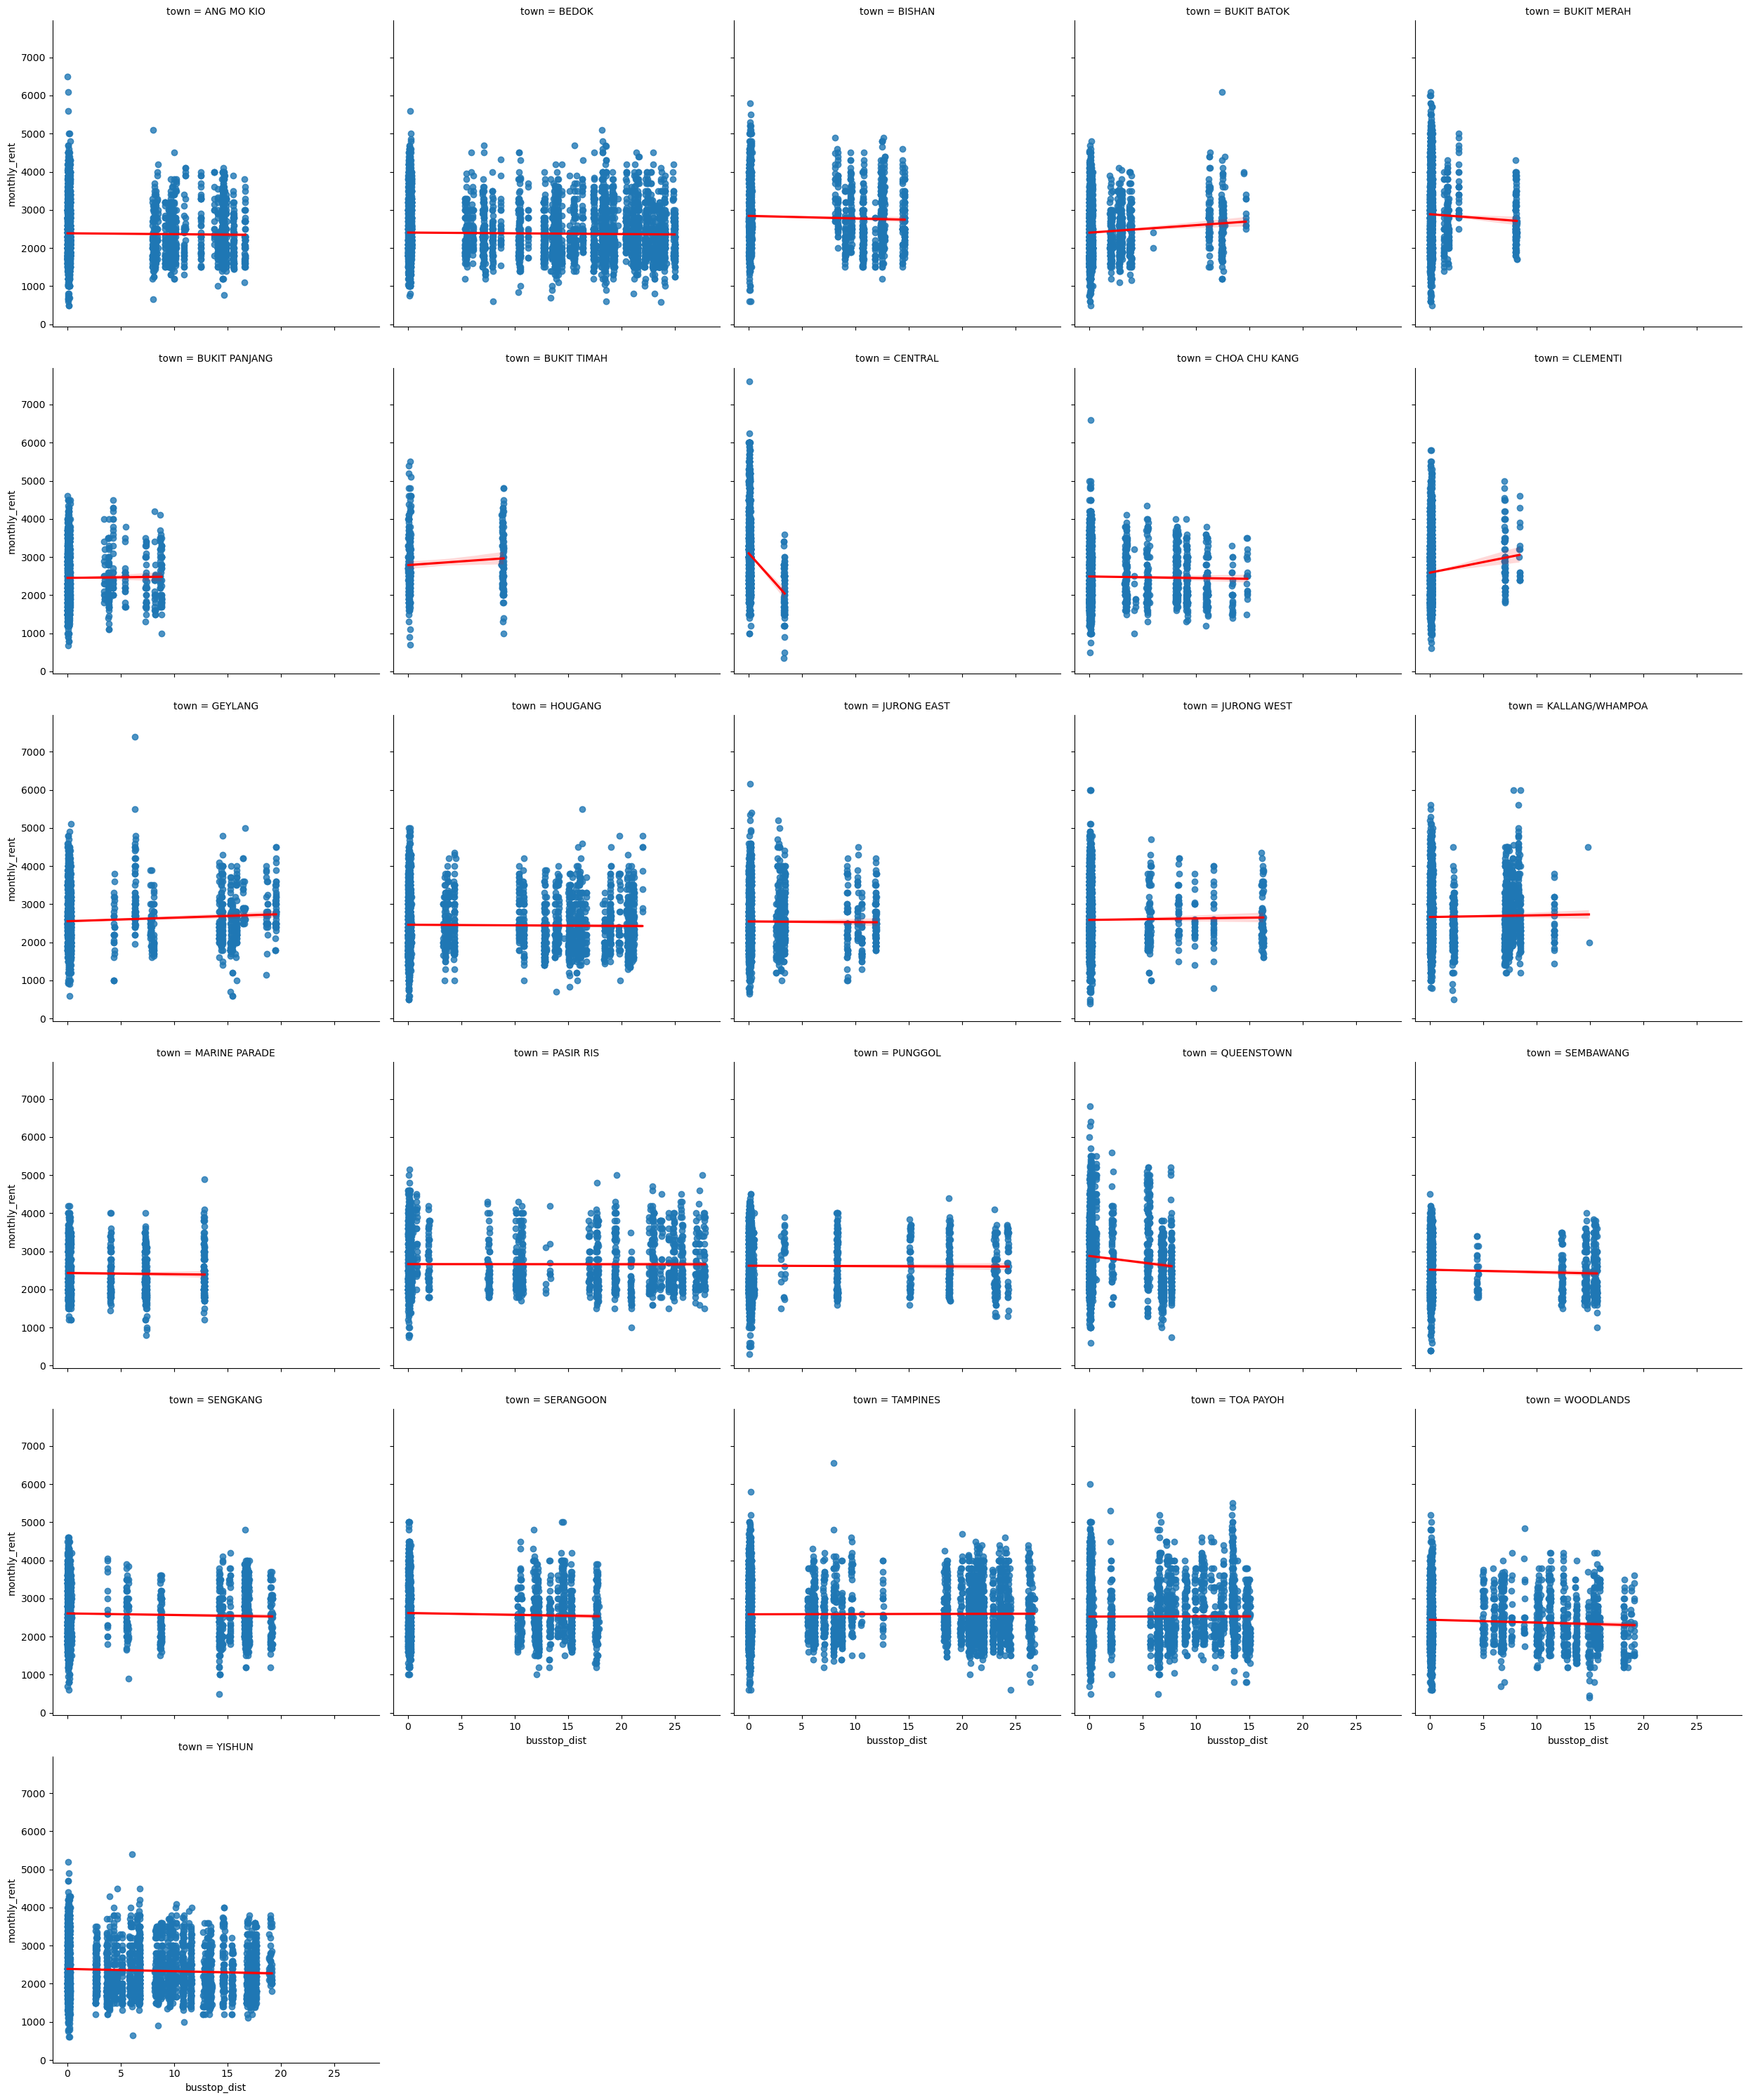

In [14]:
rent_busstop_corr = sns.lmplot(
    data=rentals_dataset, x="busstop_dist", y="monthly_rent",
    col="town", col_wrap=5, line_kws={'color': 'red'}
)

##### Geospatial plot on rental costing in each town

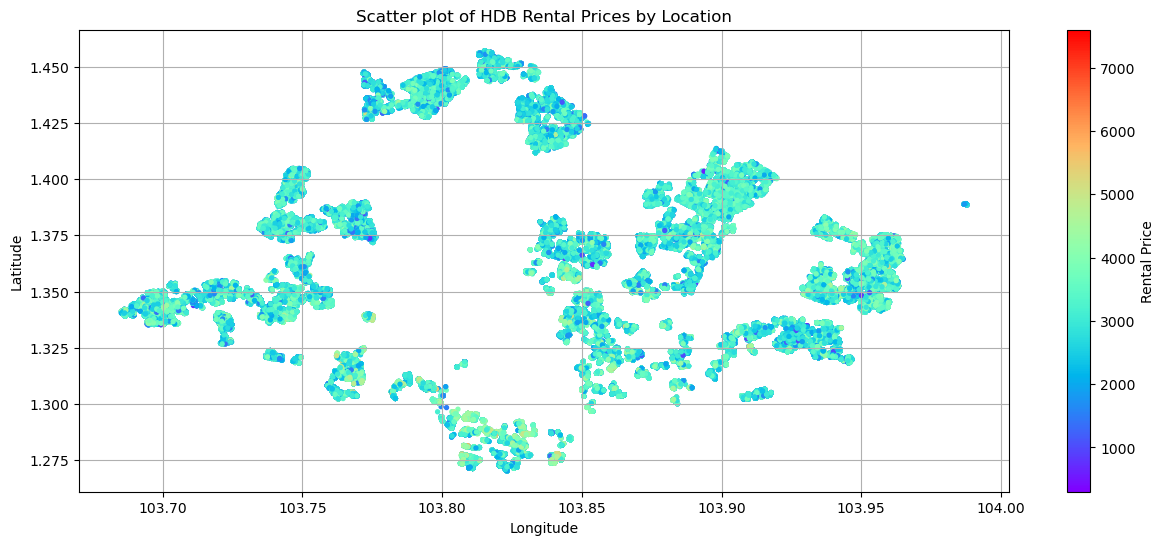

In [15]:
### PLOTTING ###
plt.figure(figsize=(15, 6))
plt.scatter(rentals_dataset['lng'], rentals_dataset['lat'], c=rentals_dataset['monthly_rent'], cmap='rainbow', s=8)

### Formatting
plt.colorbar(label='Rental Price') # Adding a color bar which maps values to colors.
plt.grid(True)
plt.title('Scatter plot of HDB Rental Prices by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.xlim(min_longitude, max_longitude)
#plt.ylim(min_latitude, max_latitude)

# Show the plot.
plt.show()


In [16]:
## DATA INVESTIGATION
rentals_dataset[rentals_dataset['monthly_rent'] == rentals_dataset['monthly_rent'].max()]


date     town block     street_name flat_type  monthly_rent  \
99479  2023-11  CENTRAL     2  TG PAGAR PLAZA    5 ROOM          7600   

      flat_type_group   region  postal       lat  ...  train_type  train_dist  \
99479          5-ROOM  Central   82002  1.275237  ...         MRT    0.480517   

       nearest_busstop  busstop_dist      nearest_shopping shopping_dist  \
99479   Tg Pagar Plaza      0.054344  MARINA BAY LINK MALL      1.317427   

                                   nearest_school school_dist  \
99479  DUKE-NUS GRADUATE MEDICAL SCHOOL SINGAPORE    1.152274   

                                nearest_intschool intschool_dist  
99479  DUKE-NUS GRADUATE MEDICAL SCHOOL SINGAPORE       1.152274  

[1 rows x 25 columns]

In [17]:
## DATA INVESTIGATION
hdb_rentals = pd.read_csv('hdb_rentals.csv', index_col = 0)
hdb_rentals[hdb_rentals['monthly_rent'] == hdb_rentals['monthly_rent'].max()]


town block     street_name flat_type  monthly_rent  \
date                                                             
2023-11  CENTRAL     2  TG PAGAR PLAZA    5-ROOM          7600   

        flat_type_group region  
date                            
2023-11          5-ROOM    NaN

In [18]:
## DATA INVESTIGATION
rentals_dataset[rentals_dataset['monthly_rent'] == rentals_dataset['monthly_rent'].min()]


date     town block   street_name flat_type  monthly_rent  \
47845  2022-04  PUNGGOL  623C  PUNGGOL CTRL    2 ROOM           300   

      flat_type_group     region  postal       lat  ...  train_type  \
47845          2-ROOM  Northeast  823623  1.399633  ...         LRT   

       train_dist   nearest_busstop  busstop_dist  \
47845    0.329323  Bet Blks 187/188      0.060176   

                  nearest_shopping shopping_dist            nearest_school  \
47845  HOUGANG GREEN SHOPPING MALL      3.470543  PUNGGOL SECONDARY SCHOOL   

      school_dist                 nearest_intschool intschool_dist  
47845     0.36747  OVERSEAS FAMILY SCHOOL SINGAPORE       3.956918  

[1 rows x 25 columns]

In [19]:
## DATA INVESTIGATION
hdb_rentals[hdb_rentals['monthly_rent'] == hdb_rentals['monthly_rent'].min()]


town block   street_name flat_type  monthly_rent flat_type_group  \
date                                                                           
2022-04  PUNGGOL  623C  PUNGGOL CTRL    2-ROOM           300          2-ROOM   

            region  
date                
2022-04  Northeast

### Data Preprocessing

Identify useful features and drop unnecessary features from the df

In [20]:
from datetime import datetime

# Transform date to more usable format
rentals_dataset['date'] = pd.to_datetime(rentals_dataset['date'])
reference_date = datetime(2023, 12, 31)

# Calculate the difference in months
rentals_dataset['months_duration'] = (
    (reference_date.year - rentals_dataset['date'].dt.year) * 12 +
    (reference_date.month - rentals_dataset['date'].dt.month)
)
rentals_dataset

date           town block         street_name flat_type  \
0      2021-01-01     ANG MO KIO   105    ANG MO KIO AVE 4    4 ROOM   
1      2021-01-01     ANG MO KIO   107    ANG MO KIO AVE 4    3 ROOM   
2      2021-01-01     ANG MO KIO   108    ANG MO KIO AVE 4    3 ROOM   
3      2021-01-01     ANG MO KIO   111    ANG MO KIO AVE 4    5 ROOM   
4      2021-01-01     ANG MO KIO   111    ANG MO KIO AVE 4    5 ROOM   
...           ...            ...   ...                 ...       ...   
104599 2023-12-01     QUEENSTOWN    59      STRATHMORE AVE    4 ROOM   
104600 2023-12-01      WOODLANDS  681D     WOODLANDS DR 62    4 ROOM   
104601 2023-12-01  CHOA CHU KANG   354  CHOA CHU KANG CTRL    4 ROOM   
104602 2023-12-01         YISHUN   717        YISHUN ST 71    4 ROOM   
104603 2023-12-01      TOA PAYOH   159     LOR 1 TOA PAYOH    3 ROOM   

        monthly_rent flat_type_group     region  postal       lat  ...  \
0               2000          4-ROOM  Northeast  560105  1.372313  ...   
1               1750          3-ROOM  Northeast  560107  1.371384  ...   
2               1750          3-ROOM  Northeast  560108  1.370966  ...   
3               2230          5-ROOM  Northeast  560111  1.370851  ...   
4               2450          5-ROOM  Northeast  560111  1.370851  ...   
...              ...             ...        ...     ...       ...  ...   
104599          4100          4-ROOM    Central  142059  1.293190  ...   
104600          3300          4-ROOM      North  734681  1.440000  ...   
104601          2950          4-ROOM       West  680354  1.382645  ...   
104602          3200          4-ROOM      North  760717  1.425752  ...   
104603          1800          3-ROOM    Central  310159  1.330745  ...   

        train_dist  nearest_busstop  busstop_dist  \
0         0.073864          BLK 163      0.221126   
1         0.145786          BLK 110      0.121067   
2         0.228003          BLK 110      0.166360   
3         0.201841          BLK 110      0.070626   
4         0.201841          BLK 110      0.070626   
...            ...              ...           ...   
104599    0.623560    Aft Dawson Rd      0.097950   
104600    1.797553         Blk 681A      0.086782   
104601    0.319505          Blk 352      8.165670   
104602    0.885971          Blk 722      3.865604   
104603    0.275142    Toa Payoh Int      0.204649   

                      nearest_shopping shopping_dist  \
0                        DJIT SUN MALL      1.118528   
1                        DJIT SUN MALL      1.153074   
2                        DJIT SUN MALL      1.071018   
3                        DJIT SUN MALL      1.172078   
4                        DJIT SUN MALL      1.172078   
...                                ...           ...   
104599     ANCHORPOINT SHOPPING CENTRE      0.860724   
104600                    HILLION MALL      8.211613   
104601         LOT ONE, SHOPPERS' MALL      0.305189   
104602                   DJIT SUN MALL      6.271406   
104603  BALESTIER HILL SHOPPING CENTRE      0.664506   

                         nearest_school  school_dist  \
0            MAYFLOWER SECONDARY SCHOOL     0.513867   
1            MAYFLOWER SECONDARY SCHOOL     0.412621   
2            MAYFLOWER SECONDARY SCHOOL     0.435416   
3            MAYFLOWER SECONDARY SCHOOL     0.358742   
4            MAYFLOWER SECONDARY SCHOOL     0.358742   
...                                 ...          ...   
104599      QUEENSTOWN SECONDARY SCHOOL     0.218686   
104600  WOODLANDS RING SECONDARY SCHOOL     0.546931   
104601          KRANJI SECONDARY SCHOOL     0.864874   
104602      NAVAL BASE SECONDARY SCHOOL     0.780952   
104603               KHENG CHENG SCHOOL     0.753227   

                                        nearest_intschool  intschool_dist  \
0                         AUSTRALIAN INTERNATIONAL SCHOOL        3.444260   
1                         AUSTRALIAN INTERNATIONAL SCHOOL        3.388034   
2                         AUSTRALIAN INTERNAT

In [21]:
# Reduced data set to drop columns that might not be useful for the initial model
reduced_df = rentals_dataset.drop(columns=['date', 'block','flat_type_group', 'postal','region','train_type', 'street_name','lat','lng',
                                          'nearest_train','nearest_busstop','nearest_school','nearest_intschool','nearest_shopping',
                                           'school_dist','price_sqm'
                                         ])
reduced_df.head()

town flat_type  monthly_rent  property_age  avg_floor_area_sqm  \
0  ANG MO KIO    4 ROOM          2000          45.0                92.0   
1  ANG MO KIO    3 ROOM          1750          45.0                78.2   
2  ANG MO KIO    3 ROOM          1750          45.0                74.5   
3  ANG MO KIO    5 ROOM          2230          45.0               117.0   
4  ANG MO KIO    5 ROOM          2450          45.0               117.0   

   train_dist  busstop_dist  shopping_dist  intschool_dist  months_duration  
0    0.073864      0.221126       1.118528        3.444260               35  
1    0.145786      0.121067       1.153074        3.388034               35  
2    0.228003      0.166360       1.071018        3.290544               35  
3    0.201841      0.070626       1.172078        3.353470               35  
4    0.201841      0.070626       1.172078        3.353470               35

Convert Categorical Variables using one-hot encoding

In [22]:
# Identify Categorical Features
cat_features = reduced_df.select_dtypes(include=['object']).columns.tolist()
cat_features_idx = [reduced_df.columns.get_loc(col) for col in cat_features]
cat_features

['town', 'flat_type']

In [23]:
categorical_cols = reduced_df.select_dtypes(include=['object']).columns
categorical_cols

Index(['town', 'flat_type'], dtype='object')

In [24]:
# Fit onehot encoder on categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cats = encoder.fit_transform(reduced_df[categorical_cols])
#encoded_cats.categories_
# Create a new DataFrame with encoded categorical features
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# Merging encoded features with the rest of the dataset
preprocessed_df = reduced_df.drop(columns=categorical_cols).reset_index(drop=True)
preprocessed_df = pd.concat([preprocessed_df, encoded_df], axis=1)
preprocessed_df

monthly_rent  property_age  avg_floor_area_sqm  train_dist  \
0               2000          45.0                92.0    0.073864   
1               1750          45.0                78.2    0.145786   
2               1750          45.0                74.5    0.228003   
3               2230          45.0               117.0    0.201841   
4               2450          45.0               117.0    0.201841   
...              ...           ...                 ...         ...   
104599          4100          23.0                89.3    0.623560   
104600          3300          23.0               103.0    1.797553   
104601          2950          30.0               106.2    0.319505   
104602          3200          36.0                86.5    0.885971   
104603          1800          51.0                70.5    0.275142   

        busstop_dist  shopping_dist  intschool_dist  months_duration  \
0           0.221126       1.118528        3.444260               35   
1           0.121067       1.153074        3.388034               35   
2           0.166360       1.071018        3.290544               35   
3           0.070626       1.172078        3.353470               35   
4           0.070626       1.172078        3.353470               35   
...              ...            ...             ...              ...   
104599      0.097950       0.860724        1.838053                0   
104600      0.086782       8.211613        3.628320                0   
104601      8.165670       0.305189        4.545849                0   
104602      3.865604       6.271406        5.969455                0   
104603      0.204649       0.664506        1.077919                0   

        town_ANG MO KIO  town_BEDOK  ...  town_TAMPINES  town_TOA PAYOH  \
0                   1.0         0.0  ...            0.0             0.0   
1                   1.0         0.0  ...            0.0             0.0   
2                   1.0         0.0  ...            0.0             0.0   
3                   1.0         0.0  ...            0.0             0.0   
4                   1.0         0.0  ...            0.0             0.0   
...                 ...         ...  ...            ...             ...   
104599              0.0         0.0  ...            0.0             0.0   
104600              0.0         0.0  ...            0.0             0.0   
104601              0.0         0.0  ...            0.0             0.0   
104602              0.0         0.0  ...            0.0             0.0   
104603              0.0         0.0  ...            0.0             1.0   

        town_WOODLANDS  town_YISHUN  flat_type_1 ROOM  flat_type_2 ROOM  \
0                  0.0          0.0               0.0               0.0   
1                  0.0          0.0               0.0               0.0   
2                  0.0          0.0               0.0               0.0   
3                  0.0          0.0               0.0               0.0   
4                  0.0          0.0               0.0               0.0   
...                ...          ...               ...               ...   
104599             0.0          0.0               0.0               0.0   
104600             1.0          0.0               0.0               0.0   
104601             0.0          0.0               0.0               0.0   
104602             0.0          1.0               0.0               0.0   
104603             0.0          0.0               0.0               0.0   

        flat_type_3 ROOM  flat_type_4 ROOM  flat_type_5 ROOM  \
0                    0.0               1.0               0.0   
1                    1.0               0.0               0.0   
2                    1.0               0.0               0.0   
3                    0.0               0.0               1.0   
4                    0.0               0.0               1.0   
...                  ...               ...               ...   
104599               0.0               1.0          

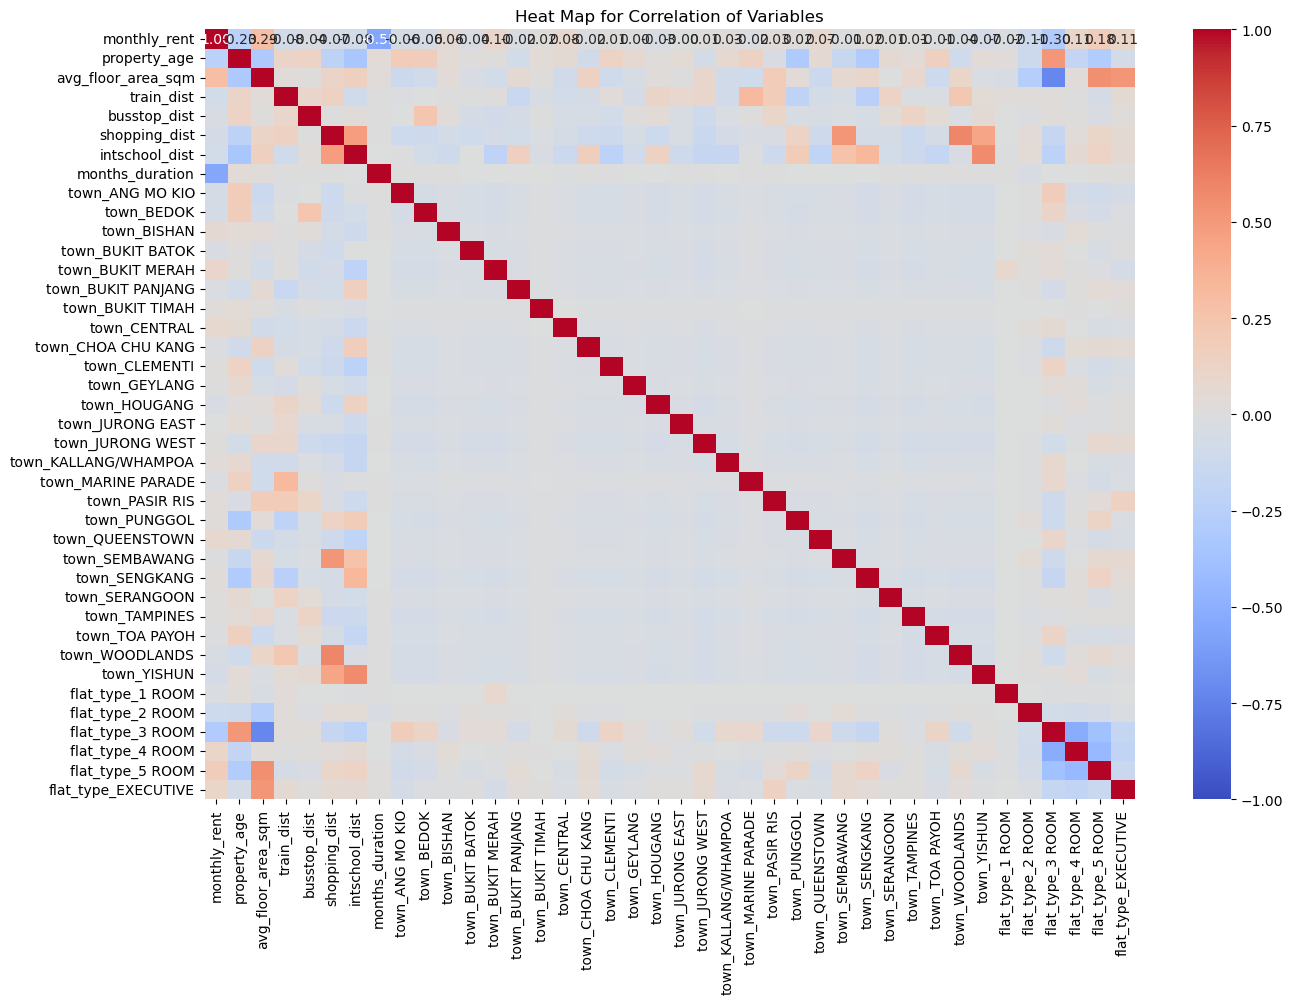

In [25]:
# Calculate the correlation matrix
corr_matrix = preprocessed_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heat Map for Correlation of Variables')
plt.show()


In [26]:
features = rentals_dataset.drop(columns=['date', 'block', 'street_name', 'flat_type_group', 'region','train_type','lat','lng',
                                      'postal', 'nearest_busstop', 'nearest_shopping', 'nearest_school', 'school_dist',
                                      'nearest_intschool','nearest_train','price_sqm'])

features

town flat_type  monthly_rent  property_age  \
0          ANG MO KIO    4 ROOM          2000          45.0   
1          ANG MO KIO    3 ROOM          1750          45.0   
2          ANG MO KIO    3 ROOM          1750          45.0   
3          ANG MO KIO    5 ROOM          2230          45.0   
4          ANG MO KIO    5 ROOM          2450          45.0   
...               ...       ...           ...           ...   
104599     QUEENSTOWN    4 ROOM          4100          23.0   
104600      WOODLANDS    4 ROOM          3300          23.0   
104601  CHOA CHU KANG    4 ROOM          2950          30.0   
104602         YISHUN    4 ROOM          3200          36.0   
104603      TOA PAYOH    3 ROOM          1800          51.0   

        avg_floor_area_sqm  train_dist  busstop_dist  shopping_dist  \
0                     92.0    0.073864      0.221126       1.118528   
1                     78.2    0.145786      0.121067       1.153074   
2                     74.5    0.228003      0.166360       1.071018   
3                    117.0    0.201841      0.070626       1.172078   
4                    117.0    0.201841      0.070626       1.172078   
...                    ...         ...           ...            ...   
104599                89.3    0.623560      0.097950       0.860724   
104600               103.0    1.797553      0.086782       8.211613   
104601               106.2    0.319505      8.165670       0.305189   
104602                86.5    0.885971      3.865604       6.271406   
104603                70.5    0.275142      0.204649       0.664506   

        intschool_dist  months_duration  
0             3.444260               35  
1             3.388034               35  
2             3.290544               35  
3             3.353470               35  
4             3.353470               35  
...                ...              ...  
104599        1.838053                0  
104600        3.628320                0  
104601        4.545849                0  
104602        5.969455                0  
104603        1.077919                0  

[104604 rows x 10 columns]

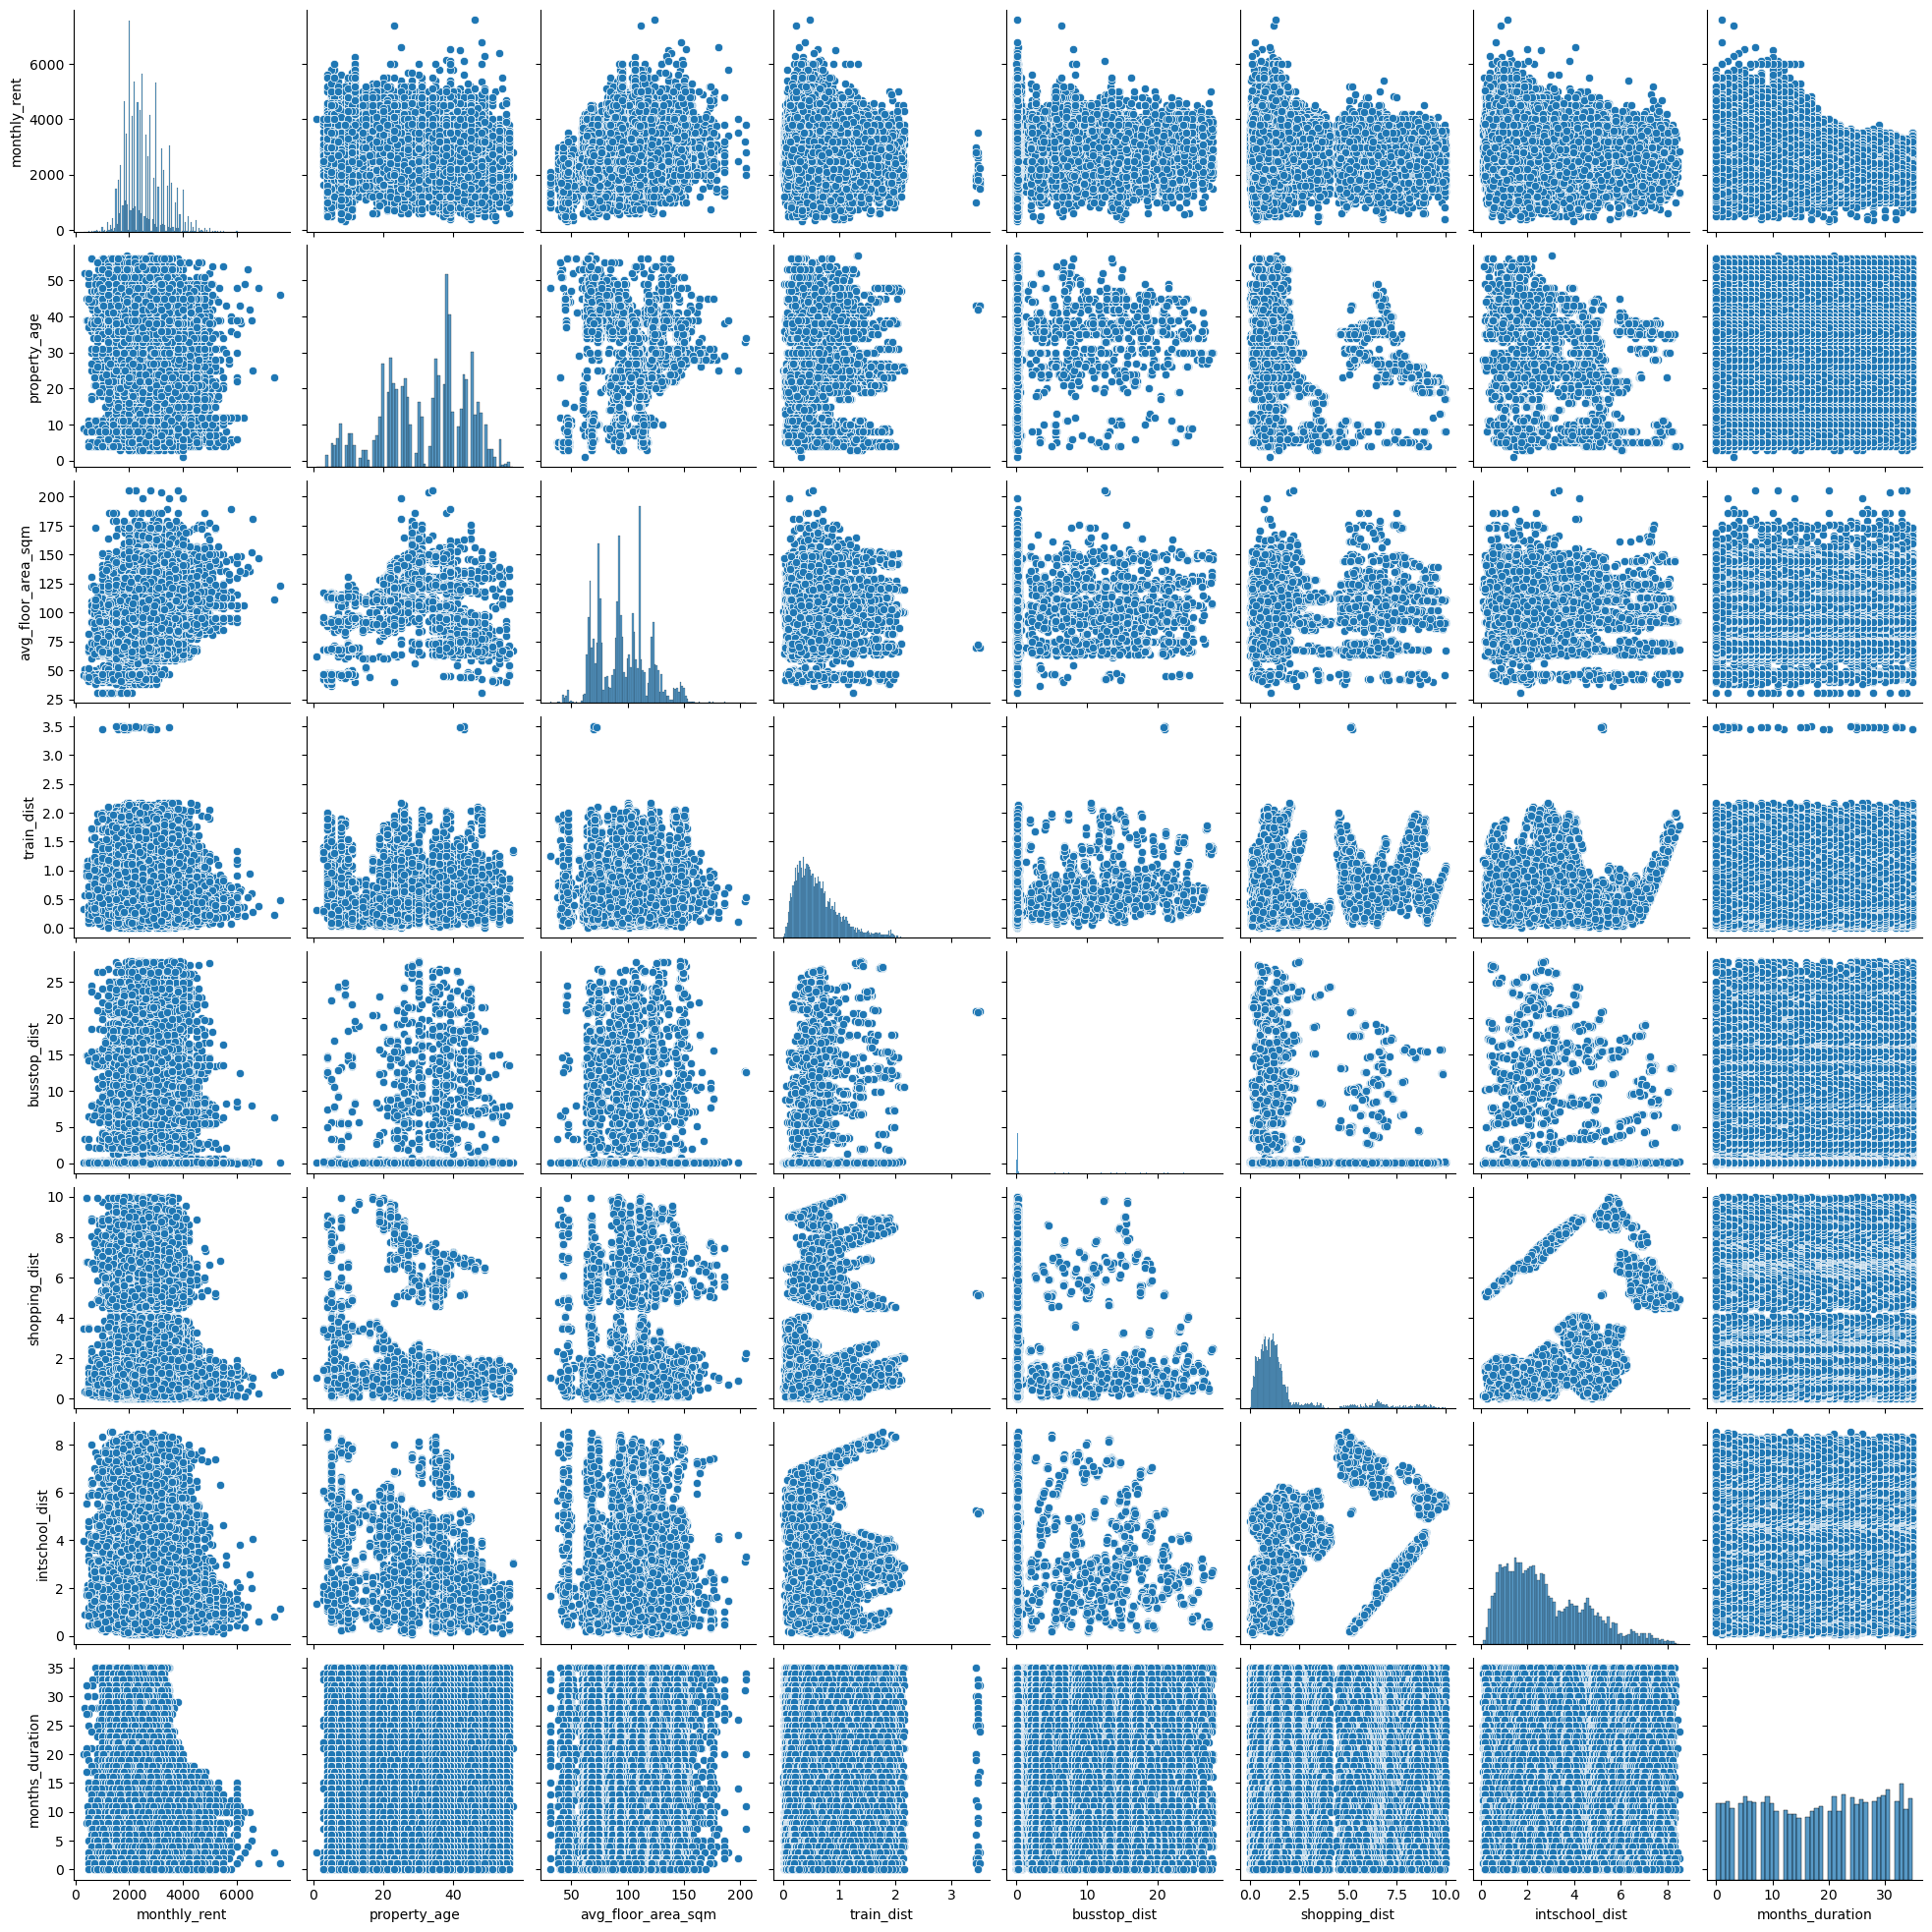

In [27]:
sns.pairplot(features)

## Data Modeling

In [28]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

In [29]:
rng = np.random.RandomState(42)  # Use this as a random_state input for machine learning models

In [30]:
y = preprocessed_df['monthly_rent'] #target variable
X = preprocessed_df.drop('monthly_rent', axis=1) #features

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rng)

In [31]:
print( X_train.shape )
print( X_test.shape )

(83683, 39)
(20921, 39)


#### Predictions with OLS Regression
> Identify which features is significant to monthly rents

In [32]:
est = sm.OLS( y, sm.add_constant(X) ).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           monthly_rent   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     3060.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:02:56   Log-Likelihood:            -7.9779e+05
No. Observations:              104604   AIC:                         1.596e+06
Df Residuals:                  104566   BIC:                         1.596e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2731.6700     24.115    113.277      0.000    2684.405    2778.935
property_age           -12.6041      0.181    -69.526      0.000     -12.959     -12.249
avg_floor_area_sqm       3.1436      0.260     12.111      0.000       2.635       3.652
train_dist            -154.8513      5.138    -30.141      0.000    -164.921    -144.782
busstop_dist             0.3432      0.292      1.175      0.240      -0.230       0.916
shopping_dist          -24.7867      3.152     -7.864      0.000     -30.964     -18.609
intschool_dist          -6.6256      2.455     -2.698      0.007     -11.438      -1.813
months_duration        -37.3566      0.145   -256.895      0.000     -37.642     -37.072
town_ANG MO KIO        133.1331      7.292     18.256      0.000     118.840     147.426
town_BEDOK              70.5266      7.137      9.882      0.000      56.539      84.515
town_BISHAN            256.1674     10.465     24.478      0.000     235.656     276.679
town_BUKIT BATOK       -45.5303      8.449     -5.389      0.000     -62.090     -28.971
town_BUKIT MERAH       427.3355      7.855     54.403      0.000     411.940     442.731
town_BUKIT PANJANG    -300.7395     11.141    -26.994      0.000    -322.575    -278.904
town_BUKIT TIMAH       319.9190     26.718     11.974      0.000     267.552     372.286
town_CENTRAL           623.2792     13.341     46.718      0.000     597.131     649.428
town_CHOA CHU KANG    -278.4759      9.945    -28.002      0.000    -297.968    -258.984
town_CLEMENTI          316.7584      9.684     32.711      0.000     297.779     335.738
town_GEYLANG           154.0634     10.226     15.066      0.000     134.021     174.105
town_HOUGANG           -57.7412      8.548     -6.755      0.000     -74.494     -40.988
town_JURONG EAST       109.6141      9.633     11.379      0.000      90.733     128.495
town_JURONG WEST       -60.9470      6.938     -8.784      0.000     -74.546     -47.348
town_KALLANG/WHAMPOA   261.4324      8.856     29.519      0.000     244.074     278.791
town_MARINE PARADE     528.4952     17.081     30.941      0.000     495.017     561.973
town_PASIR RIS         -44.9786     10.065     -4.469      0.000     -64.705     -25.252
town_PUNGGOL          -220.5795     10.096    -21.848      0.000    -240.368    -200.791
town_QUEENSTOWN        454.8394      9.675     47.013      0.000     435.877     473.802
town_SEMBAWANG        -110.4158     25.454     -4.338      0.000    -160.305     -60.526
town_SENGKANG         -258.3108      8.980    -28.764      0.000    -275.912    -240.709
town_SERANGOON         185.8274     10.427     17.821      0.000     165.390     206.265
town_TAMPINES           24.8022      6.878      3.606      0.000      11.322      38.282
town_TOA PAYOH         247.1790      8.466     29.196    

#### Decision Tree Modeling

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 

In [34]:
tree_clf = DecisionTreeClassifier( max_depth=50, random_state=rng )
tree_clf.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=50,
                       random_state=RandomState(MT19937) at 0x29C9EC440)

In [35]:
# Make predictions
Y_train_pred = tree_clf.predict( X_train )
Y_test_pred = tree_clf.predict( X_test )

In [36]:
# Generate accuracy and F1 score based on the training and testing dataesets
train_accuracy = accuracy_score( y_train, Y_train_pred)
train_f1 = f1_score( y_train, Y_train_pred, average='macro')
test_accuracy = accuracy_score(y_test, Y_test_pred)
test_f1 = f1_score(y_test, Y_test_pred, average='macro')

print("------ Accuracy ------")
print(f"Training: {train_accuracy}")
print(f"Testing: {test_accuracy}")
print("\n------ F1 Score ------")
print(f"Training: {train_f1}")
print(f"Testing: {test_f1}")

------ Accuracy ------
Training: 0.880585065066979
Testing: 0.04904163280913914

------ F1 Score ------
Training: 0.8687061935111562
Testing: 0.005610193067036684



Accuracy: This is the ratio of the number of correct predictions to the total number of input samples. It works well as a performance measure only when there are similar numbers of samples belonging to each class.

> Training Accuracy: 87.99% - This suggests that the model correctly predicts the training data 87.99% of the time.

> Testing Accuracy: 4.98% - This is extremely low, which usually indicates a model that does not generalize well to unseen data.

F1 Score: The F1 Score is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric, especially in imbalanced datasets.

> Training F1 Score: 0.8806 - This is relatively high, which means that the model has a good balance between Precision and Recall on the training set.

> Testing F1 Score: 0.0074 - This is critically low, almost zero, indicating the model performs poorly on the testing set in terms of Precision and Recall.


Overall, the results indicate a model that performs well on the training set but fails on the testing set. This is a strong sign of overfitting, where the model has learned the details and noise in the training dataset to an extent that it negatively impacts the performance on the new data. It is essential to address overfitting by methods such as obtaining more data, reducing the complexity of the model, or using techniques like cross-validation and regularization.

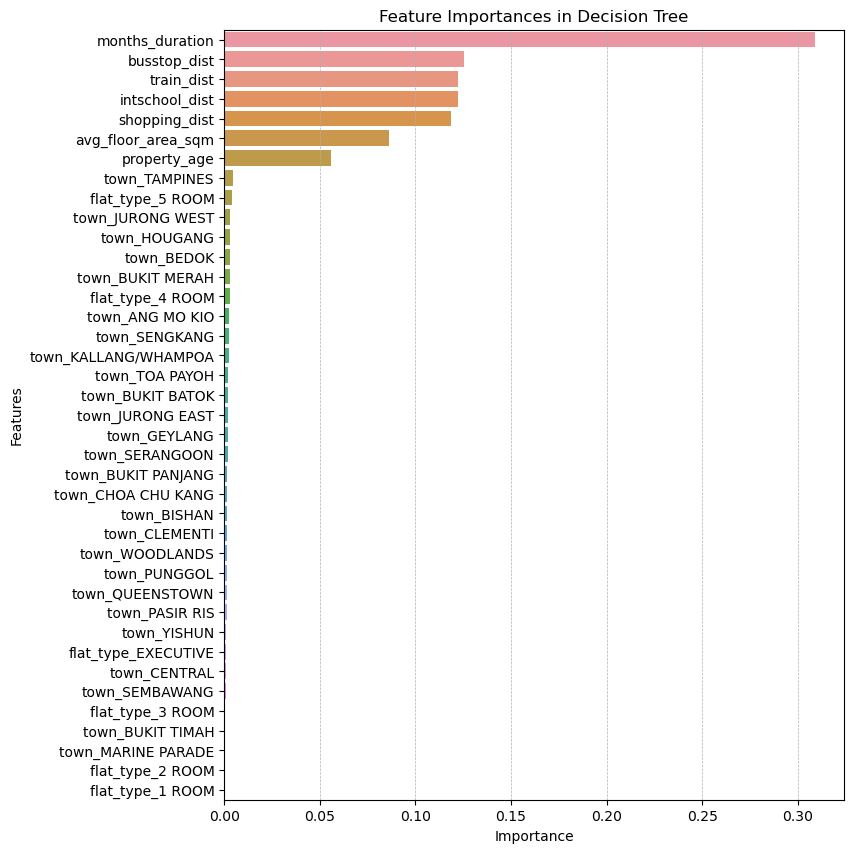

In [37]:
# feature_names contains the names of the features
feature_names = X.columns

# Get feature importances
importances = tree_clf.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Create the bar plot of the features against their importance towards the prediction
plt.figure(figsize=(8, 10))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.barplot(feature_importances_df, x='Importance', y='Feature')
plt.title('Feature Importances in Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()

##### Decision Tree Modeling: DecisionTreeRegressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree 

In [39]:
tree_reg = DecisionTreeRegressor( max_depth=5, random_state=rng )
tree_reg.fit( X_train, y_train )

DecisionTreeRegressor(max_depth=5,
                      random_state=RandomState(MT19937) at 0x29C9EC440)

[Text(0.5, 0.9166666666666666, 'node #0\nmonths_duration <= 16.5\nsquared_error = 513554.011\nsamples = 83683\nvalue = 2561.571'),
 Text(0.25, 0.75, 'node #1\navg_floor_area_sqm <= 81.85\nsquared_error = 551078.165\nsamples = 38213\nvalue = 2976.683'),
 Text(0.125, 0.5833333333333334, 'node #2\navg_floor_area_sqm <= 57.75\nsquared_error = 358789.467\nsamples = 12607\nvalue = 2565.815'),
 Text(0.0625, 0.4166666666666667, 'node #3\nmonths_duration <= 13.5\nsquared_error = 339266.429\nsamples = 722\nvalue = 2117.874'),
 Text(0.03125, 0.25, 'node #4\nproperty_age <= 11.5\nsquared_error = 310822.895\nsamples = 614\nvalue = 2175.774'),
 Text(0.015625, 0.08333333333333333, 'node #5\nsquared_error = 285293.099\nsamples = 450\nvalue = 2255.889'),
 Text(0.046875, 0.08333333333333333, 'node #6\nsquared_error = 314937.979\nsamples = 164\nvalue = 1955.945'),
 Text(0.09375, 0.25, 'node #7\ntown_QUEENSTOWN <= 0.5\nsquared_error = 373561.283\nsamples = 108\nvalue = 1788.704'),
 Text(0.078125, 0.083333

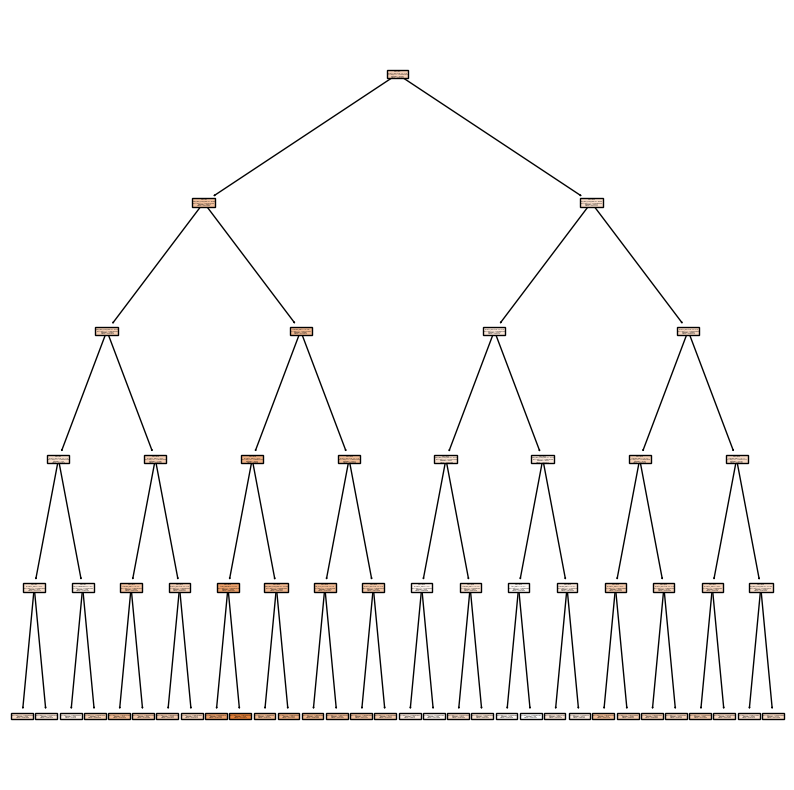

In [40]:
auto_feats = X_train.columns.tolist()

fig, ax = plt.subplots( figsize=(10,10) )

tree.plot_tree( tree_reg, feature_names=auto_feats, filled=True, node_ids=True, ax=ax )

In [41]:
# REVIEW PREDICTION

print( X_test.loc[[92184]] )
print( y_test.loc[[92184]] )


       property_age  avg_floor_area_sqm  train_dist  busstop_dist  \
92184          22.0                94.5     0.46836      0.116278   

       shopping_dist  intschool_dist  months_duration  town_ANG MO KIO  \
92184        9.19809        5.314106                4              0.0   

       town_BEDOK  town_BISHAN  ...  town_TAMPINES  town_TOA PAYOH  \
92184         0.0          0.0  ...            0.0             0.0   

       town_WOODLANDS  town_YISHUN  flat_type_1 ROOM  flat_type_2 ROOM  \
92184             0.0          0.0               0.0               0.0   

       flat_type_3 ROOM  flat_type_4 ROOM  flat_type_5 ROOM  \
92184               0.0               1.0               0.0   

       flat_type_EXECUTIVE  
92184                  0.0  

[1 rows x 39 columns]
92184    3300
Name: monthly_rent, dtype: int64


In [42]:
tree_reg.predict( X_test.loc[[92184]] )

array([3024.00693441])

In [43]:
print( tree_reg.decision_path( X_test.loc[[92184]] ))

  (0, 0)	1
  (0, 1)	1
  (0, 17)	1
  (0, 25)	1
  (0, 26)	1
  (0, 28)	1


In [44]:
# REVIEW PREDICTION
Y_true = y_test.loc[[277]]
print( X_test.loc[[277]] )
print( y_test.loc[[277]] )


     property_age  avg_floor_area_sqm  train_dist  busstop_dist  \
277          44.0                75.5    0.258666      0.228777   

     shopping_dist  intschool_dist  months_duration  town_ANG MO KIO  \
277       0.055841        2.233753               35              0.0   

     town_BEDOK  town_BISHAN  ...  town_TAMPINES  town_TOA PAYOH  \
277         1.0          0.0  ...            0.0             0.0   

     town_WOODLANDS  town_YISHUN  flat_type_1 ROOM  flat_type_2 ROOM  \
277             0.0          0.0               0.0               0.0   

     flat_type_3 ROOM  flat_type_4 ROOM  flat_type_5 ROOM  flat_type_EXECUTIVE  
277               1.0               0.0               0.0                  0.0  

[1 rows x 39 columns]
277    2000
Name: monthly_rent, dtype: int64


In [45]:
tree_reg.predict( X_test.loc[[277]] )

array([1826.88966631])

In [46]:
print( tree_reg.decision_path( X_test.loc[[277]] ))

  (0, 0)	1
  (0, 32)	1
  (0, 33)	1
  (0, 41)	1
  (0, 45)	1
  (0, 47)	1


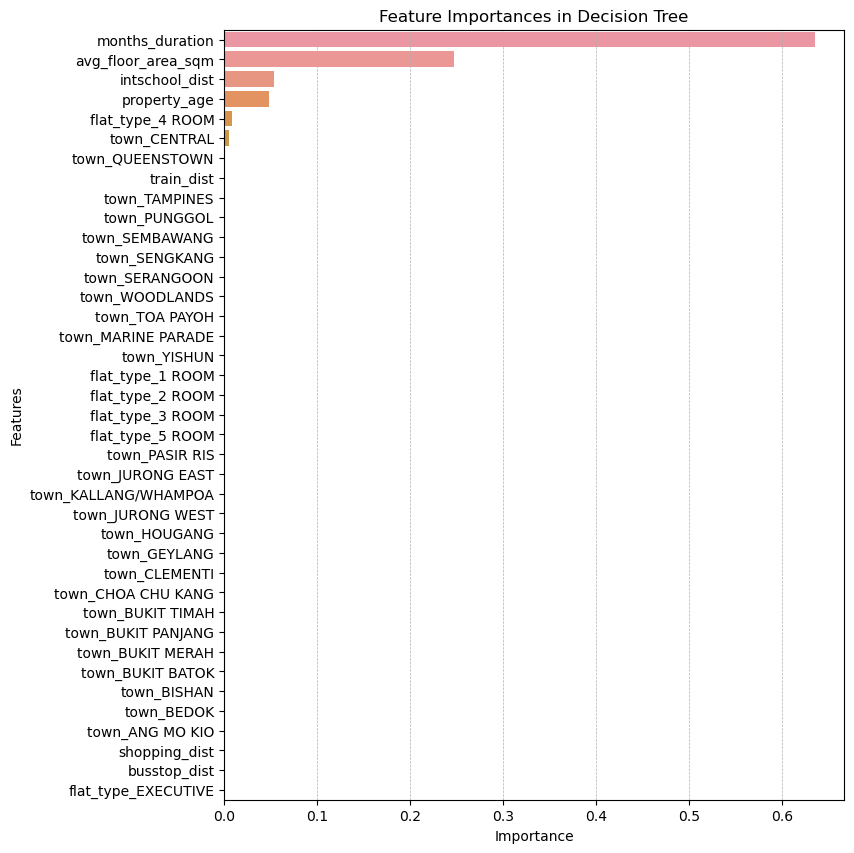

In [47]:
# feature_names contains the names of the features
feature_names = X.columns

# Get feature importances
importances = tree_reg.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Create the bar plot of the features against their importance towards the prediction
plt.figure(figsize=(8, 10))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
sns.barplot(feature_importances_df, x='Importance', y='Feature')
plt.title('Feature Importances in Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()

### Predictions with Regression (removed feature: busstop_dist)
R-squared does not change because of busstop_dist

In [48]:
X = X.drop(columns=['busstop_dist'])


In [49]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rng)

est = sm.OLS( y, sm.add_constant(X) ).fit() 
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           monthly_rent   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     3145.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:03:02   Log-Likelihood:            -7.9779e+05
No. Observations:              104604   AIC:                         1.596e+06
Df Residuals:                  104567   BIC:                         1.596e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2730.8345     24.105    113.291      0.000    2683.590    2778.079
property_age           -12.5871      0.181    -69.654      0.000     -12.941     -12.233
avg_floor_area_sqm       3.1484      0.260     12.131      0.000       2.640       3.657
train_dist            -154.5309      5.130    -30.121      0.000    -164.586    -144.475
shopping_dist          -24.6479      3.150     -7.826      0.000     -30.821     -18.475
intschool_dist          -6.5001      2.453     -2.650      0.008     -11.308      -1.692
months_duration        -37.3564      0.145   -256.893      0.000     -37.641     -37.071
town_ANG MO KIO        133.1461      7.292     18.258      0.000     118.853     147.439
town_BEDOK              72.4798      6.940     10.443      0.000      58.877      86.083
town_BISHAN            256.6308     10.458     24.540      0.000     236.134     277.128
town_BUKIT BATOK       -45.9524      8.441     -5.444      0.000     -62.497     -29.408
town_BUKIT MERAH       426.8635      7.845     54.414      0.000     411.488     442.239
town_BUKIT PANJANG    -301.2852     11.131    -27.067      0.000    -323.102    -279.468
town_BUKIT TIMAH       320.1369     26.717     11.982      0.000     267.771     372.502
town_CENTRAL           622.9216     13.338     46.703      0.000     596.780     649.064
town_CHOA CHU KANG    -278.9257      9.938    -28.068      0.000    -298.403    -259.448
town_CLEMENTI          316.2785      9.675     32.690      0.000     297.316     335.241
town_GEYLANG           154.3783     10.222     15.102      0.000     134.343     174.413
town_HOUGANG           -57.4873      8.545     -6.728      0.000     -74.235     -40.739
town_JURONG EAST       109.2330      9.628     11.346      0.000      90.363     128.103
town_JURONG WEST       -61.4182      6.927     -8.867      0.000     -74.995     -47.842
town_KALLANG/WHAMPOA   261.4642      8.856     29.522      0.000     244.106     278.823
town_MARINE PARADE     528.3096     17.080     30.932      0.000     494.833     561.786
town_PASIR RIS         -43.8019     10.015     -4.374      0.000     -63.431     -24.173
town_PUNGGOL          -220.9587     10.091    -21.897      0.000    -240.737    -201.180
town_QUEENSTOWN        454.8305      9.675     47.012      0.000     435.868     473.793
town_SEMBAWANG        -111.8611     25.424     -4.400      0.000    -161.692     -62.030
town_SENGKANG         -258.5440      8.978    -28.797      0.000    -276.141    -240.947
town_SERANGOON         186.4183     10.415     17.899      0.000     166.004     206.832
town_TAMPINES           25.8700      6.817      3.795      0.000      12.508      39.232
town_TOA PAYOH         247.7834      8.450     29.322      0.000     231.221     264.346
town_WOODLANDS         -54.0429     18.453     -2.929    

### MODEL: RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor( max_depth=3, random_state=rng )

rnd_clf.fit( X_train, y_train )

y_pred_rf = rnd_clf.predict( X_test )

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred_rf)

mae = mean_absolute_error(y_test, y_pred_rf)
                         
r2 = r2_score(y_test, y_pred_rf)

print('Mean Squared Error:', mse)

print('Mean Absolute Error:', mae)

print('R2 Score:', r2)


Mean Squared Error: 289656.4177868319
Mean Absolute Error: 417.6732787372175
R2 Score: 0.4368615868412268


### MODEL: Naive Bayes 

In [53]:
'''
df = pd.get_dummies(reduced_df, columns=['town','flat_type'])
df
'''

"\ndf = pd.get_dummies(reduced_df, columns=['town','flat_type'])\ndf\n"

In [54]:
'''
nb_y = df['monthly_rent'] #target variable
nb_X = df.drop('monthly_rent', axis=1) #features


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(nb_X, nb_y, test_size=0.2, random_state=rng)
'''

"\nnb_y = df['monthly_rent'] #target variable\nnb_X = df.drop('monthly_rent', axis=1) #features\n\n\n# Splitting the dataset into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(nb_X, nb_y, test_size=0.2, random_state=rng)\n"

In [55]:
X_test

property_age  avg_floor_area_sqm  train_dist  shopping_dist  \
82296          42.0               120.0    0.585172       1.524193   
96279          18.0                91.0    0.434208       1.473326   
99719          43.0                76.7    0.438198       0.509066   
69083          50.0                67.5    0.206942       0.942313   
24504          38.0                71.2    0.711358       0.925353   
...             ...                 ...         ...            ...   
93108          43.0                75.5    0.396159       0.956784   
65341          40.0                98.0    0.834478       1.372706   
95539          24.0               122.5    0.596074       6.767546   
20667          22.0               110.0    0.467057       1.398801   
71590          12.0                94.0    0.287092       0.661846   

       intschool_dist  months_duration  town_ANG MO KIO  town_BEDOK  \
82296        1.204232                7              0.0         0.0   
96279        3.394260                2              0.0         0.0   
99719        0.912184                1              0.0         0.0   
69083        1.643556               12              0.0         0.0   
24504        1.337216               28              0.0         0.0   
...               ...              ...              ...         ...   
93108        3.564937                3              1.0         0.0   
65341        1.451868               13              0.0         0.0   
95539        1.989777                3              0.0         0.0   
20667        2.658375               29              0.0         0.0   
71590        3.090014               11              0.0         0.0   

       town_BISHAN  town_BUKIT BATOK  ...  town_TAMPINES  town_TOA PAYOH  \
82296          0.0               0.0  ...            0.0             0.0   
96279          0.0               1.0  ...            0.0             0.0   
99719          0.0               0.0  ...            0.0             0.0   
69083          0.0               0.0  ...            0.0             1.0   
24504          0.0               0.0  ...            0.0             0.0   
...            ...               ...  ...            ...             ...   
93108          0.0               0.0  ...            0.0             0.0   
65341          0.0               0.0  ...            0.0             0.0   
95539          0.0               0.0  ...            0.0             0.0   
20667          0.0               0.0  ...            0.0             0.0   
71590          0.0               0.0  ...            1.0             0.0   

       town_WOODLANDS  town_YISHUN  flat_type_1 ROOM  flat_type_2 ROOM  \
82296             0.0          0.0               0.0               0.0   
96279             0.0          0.0               0.0               0.0   
99719             0.0          0.0               0.0               0.0   
69083             0.0          0.0               0.0               0.0   
24504             0.0          0.0               0.0               0.0   
...               ...          ...               ...               ...   
93108             0.0          0.0               0.0               0.0   
65341             0.0          0.0               0.0               0.0   
95539             1.0          0.0               0.0               0.0   
20667             0.0          0.0               0.0               0.0   
71590             0.0          0.0               0.0               0.0   

       flat_type_3 ROOM  flat_type_4 ROOM  flat_type_5 ROOM  \
82296               0.0               0.0               1.0   
96279               0.0               1.0               0.0   
99719               1.0               0.0               0.0   
69083               1.0               0.0               0.0   
24504               1.0               0.0               0.0   
...                 ...               ...               ...   
93108               1.0               0.0               0.0   
65341  

In [56]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict(X_test)

#print("Actual Value:", y_test[103966])
#print("Predicted Value:", predicted[1])

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predicted)

mae = mean_absolute_error(y_test, predicted)
                         
r2 = r2_score(y_test, predicted)

print('Mean Squared Error:', mse)

print('Mean Absolute Error:', mae)

print('R2 Score:', r2)


Mean Squared Error: 786250.528320826
Mean Absolute Error: 698.5321447349553
R2 Score: -0.5285968053008412


## Looking into creating poly features due to inaccurate modeling results

In [58]:
# Identify Numerical Features in preprocessed_df (basic categorical preprocessing)
pp_num_features = preprocessed_df.select_dtypes(exclude=['object']).columns.tolist()
#pp_num_features.remove('property_age')
pp_num_features.remove('monthly_rent')
pp_num_features_idx = [preprocessed_df.columns.get_loc(col) for col in pp_num_features]

print(pp_num_features)
print(pp_num_features_idx)

['property_age', 'avg_floor_area_sqm', 'train_dist', 'busstop_dist', 'shopping_dist', 'intschool_dist', 'months_duration', 'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL', 'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN', 'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [59]:
from sklearn import preprocessing

poly_tfr = preprocessing.PolynomialFeatures( degree=2, include_bias=False, interaction_only=True )

In [60]:

poly_feats = poly_tfr.fit_transform( preprocessed_df.iloc[:,pp_num_features_idx] )

print( preprocessed_df.iloc[:,pp_num_features_idx].shape )
print( poly_feats.shape )


(104604, 39)
(104604, 780)


In [61]:
feature_names = poly_tfr.get_feature_names_out()
feature_names

array(['property_age', 'avg_floor_area_sqm', 'train_dist', 'busstop_dist',
       'shopping_dist', 'intschool_dist', 'months_duration',
       'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL', 'town_CHOA CHU KANG', 'town_CLEMENTI',
       'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST',
       'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN',
       'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON',
       'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN',
       'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM',
       'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE',
       'property_age avg_floor_area_sqm', 'property_age train_dist',
       'property_age busstop_dist', 'property_age shopping_dist',
       'property_age intschool_dist', 'property_age months_

In [62]:
poly_feats

array([[4.50000000e+01, 9.20000000e+01, 7.38644341e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.50000000e+01, 7.82000000e+01, 1.45786151e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.50000000e+01, 7.45000000e+01, 2.28002947e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.00000000e+01, 1.06200000e+02, 3.19504622e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.60000000e+01, 8.65000000e+01, 8.85971298e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.10000000e+01, 7.05000000e+01, 2.75141757e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [63]:
# Now create a DataFrame with the polynomial features array and the feature names
poly_feats_df = pd.DataFrame(poly_feats, columns=feature_names)
poly_feats_df

property_age  avg_floor_area_sqm  train_dist  busstop_dist  \
0               45.0                92.0    0.073864      0.221126   
1               45.0                78.2    0.145786      0.121067   
2               45.0                74.5    0.228003      0.166360   
3               45.0               117.0    0.201841      0.070626   
4               45.0               117.0    0.201841      0.070626   
...              ...                 ...         ...           ...   
104599          23.0                89.3    0.623560      0.097950   
104600          23.0               103.0    1.797553      0.086782   
104601          30.0               106.2    0.319505      8.165670   
104602          36.0                86.5    0.885971      3.865604   
104603          51.0                70.5    0.275142      0.204649   

        shopping_dist  intschool_dist  months_duration  town_ANG MO KIO  \
0            1.118528        3.444260             35.0              1.0   
1            1.153074        3.388034             35.0              1.0   
2            1.071018        3.290544             35.0              1.0   
3            1.172078        3.353470             35.0              1.0   
4            1.172078        3.353470             35.0              1.0   
...               ...             ...              ...              ...   
104599       0.860724        1.838053              0.0              0.0   
104600       8.211613        3.628320              0.0              0.0   
104601       0.305189        4.545849              0.0              0.0   
104602       6.271406        5.969455              0.0              0.0   
104603       0.664506        1.077919              0.0              0.0   

        town_BEDOK  town_BISHAN  ...  flat_type_2 ROOM flat_type_3 ROOM  \
0              0.0          0.0  ...                                0.0   
1              0.0          0.0  ...                                0.0   
2              0.0          0.0  ...                                0.0   
3              0.0          0.0  ...                                0.0   
4              0.0          0.0  ...                                0.0   
...            ...          ...  ...                                ...   
104599         0.0          0.0  ...                                0.0   
104600         0.0          0.0  ...                                0.0   
104601         0.0          0.0  ...                                0.0   
104602         0.0          0.0  ...                                0.0   
104603         0.0          0.0  ...                                0.0   

        flat_type_2 ROOM flat_type_4 ROOM  flat_type_2 ROOM flat_type_5 ROOM  \
0                                     0.0                                0.0   
1                                     0.0                                0.0   
2                                     0.0                                0.0   
3                                     0.0                                0.0   
4                                     0.0                                0.0   
...                                   ...                                ...   
104599                                0.0                                0.0   
104600                                0.0                                0.0   
104601                                0.0                                0.0   
104602                                0.0                                0.0   
104603                                0.0                                0.0   

        flat_type_2 ROOM flat_type_EXECUTIVE  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
104599                                   0.0   
104600              

### Further Preprocessing (can ignore this section)

In [82]:
# Identify Numerical Features in preprocessed_df (basic categorical preprocessing)
fpp_num_features = poly_feats_df.select_dtypes(exclude=['object']).columns.tolist()
fpp_num_features.remove('property_age')
fpp_num_features_idx = [poly_feats_df.columns.get_loc(col) for col in fpp_num_features]

print(fpp_num_features)
print(fpp_num_features_idx)

['avg_floor_area_sqm', 'train_dist', 'busstop_dist', 'shopping_dist', 'intschool_dist', 'months_duration', 'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL', 'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN', 'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE', 'property_age avg_floor_area_sqm', 'property_age train_dist', 'property_age busstop_dist', 'property_age shopping_dist', 'property_age intschool_dist', 'property_age months_duration', 'property_age town_ANG MO KIO', 'property_age town_BEDOK', 'property_age town_BISHAN', 'property_age town_BUK

In [78]:
# Identify Discrete Features
disc_features = poly_feats_df['property_age']
disc_features_idx = [poly_feats_df.columns.get_loc('property_age')]
disc_features_idx

[0]

In [79]:
# Identify Cat Features
cat_features = poly_feats_df.select_dtypes(include=['object']).columns.tolist()
cat_features_idx = [poly_feats_df.columns.get_loc(col) for col in fpp_num_features]
cat_features

[]

In [80]:
from sklearn import pipeline
from sklearn import compose

scaler = preprocessing.StandardScaler()
discretizer = preprocessing.KBinsDiscretizer( n_bins=5, strategy='uniform', encode='onehot', subsample=None )
#oh_enc = preprocessing.OneHotEncoder( categories='auto', handle_unknown='ignore' )
#ord_enc = preprocessing.OrdinalEncoder( categories='auto' )

In [84]:
preprocessor = compose.ColumnTransformer(
                transformers=[
                    ('num', scaler, fpp_num_features_idx),
                    #('disc', discretizer, disc_features_idx),
                    #('cat', oh_enc, cat_features),
                    #('ord', ord_enc, ordinal_features)
                ], remainder="passthrough"
                )

In [85]:
preprocd_data = preprocessor.fit_transform(poly_feats_df)
print( preprocd_data.shape )
preprocd_data

(104604, 780)


array([[-0.1614401 , -1.37329844, -0.41877689, ...,  0.        ,
         0.        , 45.        ],
       [-0.76158218, -1.19248813, -0.43638122, ...,  0.        ,
         0.        , 45.        ],
       [-0.92248984, -0.98579612, -0.42841232, ...,  0.        ,
         0.        , 45.        ],
       ...,
       [ 0.4560974 , -0.75576204,  0.9789842 , ...,  0.        ,
         0.        , 30.        ],
       [-0.40062716,  0.66832821,  0.22243177, ...,  0.        ,
         0.        , 36.        ],
       [-1.09644406, -0.86728973, -0.4216758 , ...,  0.        ,
         0.        , 51.        ]])

In [87]:
data_preprcd = pd.DataFrame(preprocd_data)
data_preprcd.index = poly_feats_df.index
data_preprcd.head()

0         1         2         3         4         5         6    \
0 -0.161440 -1.373298 -0.418777 -0.370574  0.363313  1.624526  4.047807   
1 -0.761582 -1.192488 -0.436381 -0.354586  0.331524  1.624526  4.047807   
2 -0.922490 -0.985796 -0.428412 -0.392561  0.276404  1.624526  4.047807   
3  0.925774 -1.051567 -0.445256 -0.345791  0.311982  1.624526  4.047807   
4  0.925774 -1.051567 -0.445256 -0.345791  0.311982  1.624526  4.047807   

        7         8         9    ...  770  771  772  773  774  775  776  777  \
0 -0.252426 -0.155157 -0.198386  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1 -0.252426 -0.155157 -0.198386  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2 -0.252426 -0.155157 -0.198386  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3 -0.252426 -0.155157 -0.198386  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4 -0.252426 -0.155157 -0.198386  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   778   779  
0  0.0  45.0  
1  0.0  45.0  
2  0.0  45.0  
3  0.0  45.0  
4  0.0  45.0  

[5 rows x 780 columns]

In [88]:
feature_names.shape

(780,)

In [89]:
data_preprcd.columns = feature_names
data_preprcd

property_age  avg_floor_area_sqm  train_dist  busstop_dist  \
0          -0.161440           -1.373298   -0.418777     -0.370574   
1          -0.761582           -1.192488   -0.436381     -0.354586   
2          -0.922490           -0.985796   -0.428412     -0.392561   
3           0.925774           -1.051567   -0.445256     -0.345791   
4           0.925774           -1.051567   -0.445256     -0.345791   
...              ...                 ...         ...           ...   
104599     -0.278859            0.008631   -0.440448     -0.489883   
104600      0.316934            2.960034   -0.442413      2.912038   
104601      0.456097           -0.755762    0.978984     -0.746979   
104602     -0.400627            0.668328    0.222432      2.014129   
104603     -1.096444           -0.867290   -0.421676     -0.580691   

        shopping_dist  intschool_dist  months_duration  town_ANG MO KIO  \
0            0.363313        1.624526         4.047807        -0.252426   
1            0.331524        1.624526         4.047807        -0.252426   
2            0.276404        1.624526         4.047807        -0.252426   
3            0.311982        1.624526         4.047807        -0.252426   
4            0.311982        1.624526         4.047807        -0.252426   
...               ...             ...              ...              ...   
104599      -0.544813       -1.683161        -0.247047        -0.252426   
104600       0.467378       -1.683161        -0.247047        -0.252426   
104601       0.986136       -1.683161        -0.247047        -0.252426   
104602       1.791023       -1.683161        -0.247047        -0.252426   
104603      -0.974582       -1.683161        -0.247047        -0.252426   

        town_BEDOK  town_BISHAN  ...  flat_type_2 ROOM flat_type_3 ROOM  \
0        -0.155157    -0.198386  ...                                0.0   
1        -0.155157    -0.198386  ...                                0.0   
2        -0.155157    -0.198386  ...                                0.0   
3        -0.155157    -0.198386  ...                                0.0   
4        -0.155157    -0.198386  ...                                0.0   
...            ...          ...  ...                                ...   
104599   -0.155157    -0.198386  ...                                0.0   
104600   -0.155157    -0.198386  ...                                0.0   
104601   -0.155157    -0.198386  ...                                0.0   
104602   -0.155157    -0.198386  ...                                0.0   
104603   -0.155157    -0.198386  ...                                0.0   

        flat_type_2 ROOM flat_type_4 ROOM  flat_type_2 ROOM flat_type_5 ROOM  \
0                                     0.0                                0.0   
1                                     0.0                                0.0   
2                                     0.0                                0.0   
3                                     0.0                                0.0   
4                                     0.0                                0.0   
...                                   ...                                ...   
104599                                0.0                                0.0   
104600                                0.0                                0.0   
104601                                0.0                                0.0   
104602                                0.0                                0.0   
104603                                0.0                                0.0   

        flat_type_2 ROOM flat_type_EXECUTIVE  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
104599                                   0.0   
104600              

### Modeling Round 2: REGRESSION

In [73]:
y = preprocessed_df['monthly_rent'] #target variable
X = data_preprcd #features

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_preprcd, y, test_size=0.2, random_state=rng)


In [74]:

est = sm.OLS( y, sm.add_constant(data_preprcd) ).fit() 
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           monthly_rent   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     345.9
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:04:21   Log-Likelihood:            -7.9530e+05
No. Observations:              104604   AIC:                         1.591e+06
Df Residuals:                  104246   BIC:                         1.595e+06
Df Model:                         357                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     1128.4589     40.361     27.959      0.000    1049.351    1207.567
property_age                             -1.393e+12   1.42e+13     -0.098      0.922   -2.93e+13    2.65e+13
avg_floor_area_sqm                       -6.357e+09    6.5e+10     -0.098      0.922   -1.34e+11    1.21e+11
train_dist                                  1.8e+09   1.84e+10      0.098      0.922   -3.43e+10    3.79e+10
busstop_dist                              6.425e+09   6.57e+10      0.098      0.922   -1.22e+11    1.35e+11
shopping_dist                            -2.511e+10   2.57e+11     -0.098      0.922   -5.28e+11    4.78e+11
intschool_dist                           -1.851e+10   1.89e+11     -0.098      0.922    -3.9e+11    3.52e+11
months_duration                            8.46e+10   8.65e+11      0.098      0.922   -1.61e+12    1.78e+12
town_ANG MO KIO                           1.396e+10   1.43e+11      0.098      0.922   -2.66e+11    2.94e+11
town_BEDOK                                6.792e+10   6.94e+11      0.098      0.922   -1.29e+12    1.43e+12
town_BISHAN                               6.893e+08   7.05e+09      0.098      0.922   -1.31e+10    1.45e+10
town_BUKIT BATOK                           6.42e+10   6.56e+11      0.098      0.922   -1.22e+12    1.35e+12
town_BUKIT MERAH                          4.019e+10   4.11e+11      0.098      0.922   -7.65e+11    8.46e+11
town_BUKIT PANJANG                       -1.681e+08   1.72e+09     -0.098      0.922   -3.54e+09     3.2e+09
town_BUKIT TIMAH                          1.206e+11   1.23e+12      0.098      0.922    -2.3e+12    2.54e+12
town_CENTRAL                              2.109e+10   2.16e+11      0.098      0.922   -4.02e+11    4.44e+11
town_CHOA CHU KANG                       -5.733e+10   5.86e+11     -0.098      0.922   -1.21e+12    1.09e+12
town_CLEMENTI                            -3.648e+10   3.73e+11     -0.098      0.922   -7.68e+11    6.95e+11
town_GEYLANG                              3.047e+09   3.12e+10      0.098      0.922    -5.8e+10    6.41e+10
town_HOUGANG                              2.038e+10   2.08e+11      0.098      0.922   -3.88e+11    4.29e+11
town_JURONG EAST                          9.717e+10   9.94e+11      0.098      0.922   -1.85e+12    2.04e+12
town_JURONG WEST                          2.373e+10   2.43e+11      0.098      0.922   -4.52e+11    4.99e+11
town_KALLANG/WHAMPOA                     -1.152e+11   1.18e+12     -0.098      0.922   -2.42e+12    2.19e+12
town_MARINE PARADE                       -1.814e+11   1.85e+12     -0.098      0.922   -3.82e+12    3.45e+12
town_PASIR RIS                           -2.718e+10   2.78e+11     -0.098      0.922   -5.72e+11    5.18e+11
town_PUNGGOL                   

### Modeling Round 2: NAIVE BAYES

In [75]:

from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
#predicted = model.predict([X_test[6]])

#print("Actual Value:", [y_test[6]])
#print("Predicted Value:", predicted[0])


GaussianNB()

In [ ]:

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)


#### EXCLUDE TOWN AS A VARIABLE OR CATEGORISE TOWN AS MATURE/NON-MATURE

In [ ]:
features2 = rentals_dataset.drop(columns=['date', 'block', 'street_name', 'flat_type_group', 'region','train_type','lat','lng',
                                      'postal', 'nearest_busstop', 'nearest_shopping', 'nearest_school', 'school_dist',
                                      'nearest_intschool', 'months_duration','nearest_train','price_sqm','town'])

features2

In [ ]:
y = preprocessed_df['monthly_rent'] #target variable
X = preprocessed_df.drop('monthly_rent', axis=1) #features

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rng)